<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/T2/Janio_Souza_Lima_ML_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Aprendizado de Máquina - 2021/1**

* **Trabalho 02**
* **Professor**: Eduardo Bezerra
* **Aluno**: Janio de Souza Lima

##Preparação do ambiente

Importação de bibliotecas

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.optimize as opt

Carga de arquivos para ambiente (apenas para uso deste notebook no Google Colab)

In [2]:
from google.colab import drive

In [3]:
#Conecta o Google Colab ao Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


A etapa anterior apenas conecta ao seu Google Drive, após rodá-la e autenticar a sessão usando o link da API da Google, o código abaixo deve ser executado para apontar para o diretório de trabalho no qual estão gravados os códigos e bibliotecas personalziadas que serão usados na análise.

Os códigos* em questão estão disponíveis em: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1/code

** Em alguns casos foi necessário adaptar partes das funções originais disponíveis no repositório citado ou substituí-las por versões que estão escritas nas próprias células deste notebook* ou no repositório disponível em: https://github.com/janiosl/python.ds/tree/master/ml/T1/code.

A pasta com os dados deve ser gravada neste mesmo diretório com o nome *data*, assim os trechos nos quais os conjuntos de dados são carregados rodarão sem problemas.

In [4]:
#Define o path dos códigos e dados como diretório de trabalho atual
import os
dir = '/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/t2'
os.chdir(dir)

In [5]:
#Bibliotecas/módulos utilitários personalizados
from util.read_dataset import read_dataset

#1 Aprendizado Supervisionado Revisitado

##1.1 Aprendizado com Regressores

###1.1.1 Regressão com uma variável

Análise preliminar dos dados

In [ ]:
#Carga dos dados usando as bibliotecas pandas e numpy
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Population', 'Profit'])

#Convertendo os dados para numpy array
X = np.array(dados.Population)
X = X.reshape(-1, 1)
y = np.array(dados.Profit)

dados.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
#Informações gerais do dataset carregado
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
#Sumário estatístico dos dados
dados.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


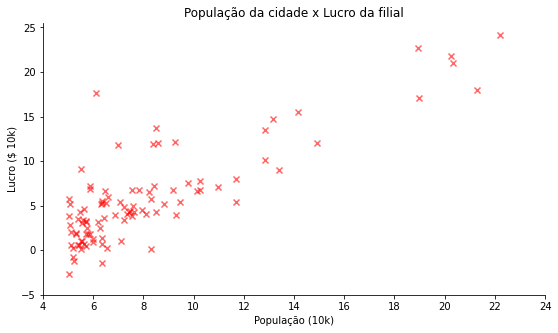

In [ ]:
#Geração do gráfico de dispersão
plt.figure(figsize=(9,5))
plt.scatter(dados.Population,
            dados.Profit,
            marker='x',
            color='red',
            alpha=0.6)

plt.xticks([4,6,8,10,12,14,16,18,20,22,24])
plt.yticks([-5,0,5,10,15,20,25])

plt.title('População da cidade x Lucro da filial')
plt.xlabel('População (10k)')
plt.ylabel('Lucro ($ 10k)')

plt.savefig('target/plot1.1.1.png')

sns.despine()

Criação de modelos de regressão baseados nos algoritmos ***k-NN*** e ***Decision Trees***.

####Aplicação básica do **k-NN** sem sintonização de hiperparâmetros.

---

Na geração do modelo ***k-NN*** abaixo foi definido, de forma arbitrária, o parâmetro `n_neighbors`.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#Divisão dos valores em treino e teste
#OBSERVAÇÃO: random_state está sendo usado para reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
#Criação do objeto com os parâmetros do modelo
model = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')

In [ ]:
#Treinamento do modelo
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([19.18341697,  2.09002643,  1.81531929,  3.52056822,  0.45514218,
        7.28814371, 22.33804637,  8.04648035,  1.90584025,  2.64326988,
        4.25026806,  4.50127752,  2.68126569, 10.15035769,  4.93402555,
        4.53103741,  2.0256771 ,  1.32693927,  3.43575169,  4.85189867])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#Avaliação do modelo
rmse_knn = sqrt(mean_squared_error(y_test, y_pred))
print(rmse_knn)

3.9782475830030886


####Aplicação básica do algoritmo **Decision Trees** sem sintonização de hiperparâmetros.

---

Na geração do modelo da árvore de decisão abaixo foi definido, de forma arbitrária, o parâmetro `max_depth` para limitar a profundidade da árvore e reduzir a possibilidade de sobreajustamento.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Criação e treinamento do modelo
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

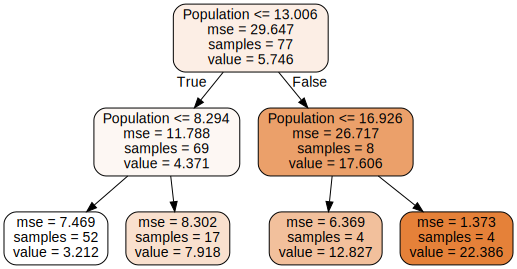

In [ ]:
export_graphviz(
        tree_reg,
        out_file='reg_tree.dot',
        feature_names=['Population'],
        class_names=['Profit'],
        rounded=True,
        filled=True
    )

Source.from_file('reg_tree.dot')

In [ ]:
#Converter arquivo .dot em .png
!dot -Tpng reg_tree.dot -o target/reg_tree.png

In [ ]:
y_pred = tree_reg.predict(X_test)

In [ ]:
y_pred

array([22.386     ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,
        7.91843529, 22.386     ,  7.91843529,  3.211595  ,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  7.91843529,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ])

In [ ]:
#Avaliação do modelo
rmse_dtree = sqrt(mean_squared_error(y_test, y_pred))
print(rmse_dtree)

4.215675881663337


In [ ]:
#print(f'RMSE k-NN: {rmse_knn:.3f}\nRMSE Decition Tree: {rmse_dtree:.3f}')
print('RMSE dos modelos\n\nk-NN               | Decision Tree')
print('-'*40)
print(rmse_knn, rmse_dtree, sep=' | ')

RMSE dos modelos

k-NN               | Decision Tree
----------------------------------------
3.9782475830030886 | 4.215675881663337


Como os modelos anteriores foram treinados utilizando parâmetros definidios de maneira harbitrária, mesmo que seja possível compará-los usando a métrica escolhida (RMSE), não é possível afirmar que eles já apresentam os melhores resultados que cada algoritmo seria capaz de apresentar para este conjunto de dados.

Para buscar resultados mais otimizados que auxiliem na escolha do algoritmo e do modelo, utilizaremos a sintonização de hiperparâmetros usando validação cruzada e testes de valores aleatórios dos hiperparâmetros. Para essa implementação será usada a função `RandomizedSearchCV` da bibliotca Scikit-Learn.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### Aplicação do algoritmo ***k-NN*** com sintonização de hiperparâmetros.

---

Para seleção do modelo ***k-NN*** abaixo foram realizados testes com valores diferentes para o parâmetro `n_neighbors`.

In [ ]:
#Criação do objeto sem o parâmetro que será analisado
knn = KNeighborsRegressor(weights = 'distance')

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'n_neighbors': [5, 10, 15, 20, 25, 30]}

In [ ]:
randomGrd_search = RandomizedSearchCV(knn,
                                      param,
                                      n_iter=20,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

In [ ]:
randomGrd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='distance'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3.421699000444819 {'n_neighbors': 5}
3.4375151995051834 {'n_neighbors': 10}
3.502240429800021 {'n_neighbors': 15}
3.5857621897655014 {'n_neighbors': 20}
3.6579755754920162 {'n_neighbors': 25}
3.738083076740441 {'n_neighbors': 30}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'n_neighbors': 5}

In [ ]:
best_rmse_knn = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_knn:.3f}')

RMSE Melhor modelo: 3.422


Criação do modelo baseado no melhor resultado da selação de hiperparâmetros.

In [ ]:
#Recuperação do modelo treinado
best_knn = randomGrd_search.best_estimator_

In [ ]:
#Aplicação do modelo treinado nos dados de teste
final_pred = best_knn.predict(X_test)
final_pred

array([21.92758308,  1.80275007,  1.7051642 ,  3.51739838, -0.13539576,
        6.06857021, 22.5835162 ,  8.03758736,  1.74865393,  2.35961441,
        4.31765663,  4.71402868,  2.77345774, 10.2193069 ,  4.81380551,
        5.07143949,  1.89242745,  0.98349951,  3.73561435,  4.65381532])

In [ ]:
#Avaliação do modelo
final_mse_knn = mean_squared_error(y_test, final_pred)
final_rmse_knn = np.sqrt(final_mse_knn)
final_rmse_knn

4.155912760314783

####Aplicação do algoritmo ***Decision Trees*** com sintonização de hiperparâmetros.

---

Para seleção do modelo abaixo foram realizados testes com valores diferentes para os parâmetros `max_depth` que define a profundidade da árvore e `criterion`.

In [ ]:
#help(DecisionTreeRegressor)

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
param = {'max_depth': [2, 3, 4, None],
         'criterion': ['mse', 'friedman_mse', 'mae']}

In [ ]:
randomGrd_search = RandomizedSearchCV(dtree,
                                      param,
                                      n_iter=20,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

In [ ]:
randomGrd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

Abaixo são exisbidos os resultados para as combinações de parâmetros. Em seguida são exibidos os parâmetros e a avaliação do melhor modelo encontrado.

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3.1785438718568404 {'max_depth': 2, 'criterion': 'mse'}
3.289172585528215 {'max_depth': 3, 'criterion': 'mse'}
3.2522741967508164 {'max_depth': 4, 'criterion': 'mse'}
4.1125717238964254 {'max_depth': None, 'criterion': 'mse'}
3.1785438718568404 {'max_depth': 2, 'criterion': 'friedman_mse'}
3.289172585528215 {'max_depth': 3, 'criterion': 'friedman_mse'}
3.2522741967508164 {'max_depth': 4, 'criterion': 'friedman_mse'}
4.1125717238964254 {'max_depth': None, 'criterion': 'friedman_mse'}
3.3392085336981676 {'max_depth': 2, 'criterion': 'mae'}
3.2540882640699964 {'max_depth': 3, 'criterion': 'mae'}
3.632254573071467 {'max_depth': 4, 'criterion': 'mae'}
4.112562991735497 {'max_depth': None, 'criterion': 'mae'}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'criterion': 'mse', 'max_depth': 2}

In [ ]:
best_rmse_tree = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_tree:.3f}')

RMSE Melhor modelo: 3.179


Criação de um modelo com base nos melhores parâmetros.

In [ ]:
#Recuperação do modelo treinado
best_tree = randomGrd_search.best_estimator_

In [ ]:
#Aplicação do modelo treinado nos dados de teste
final_pred = best_tree.predict(X_test)
final_pred

array([22.386     ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,
        7.91843529, 22.386     ,  7.91843529,  3.211595  ,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  7.91843529,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ])

In [ ]:
#Avaliação do modelo
final_mse_dtree = mean_squared_error(y_test, final_pred)
final_rmse_dtree = np.sqrt(final_mse_dtree)
final_rmse_dtree

4.215675881663337

**Comparação dos resultados finais**

In [ ]:
print('RMSE dos modelos selecionados\n\nAnálise      | k-NN              | Decision Tree')
print('-'*55)
print('Val. Cruzada', best_rmse_knn, best_rmse_tree, sep=' | ')
print('Teste       ', final_rmse_knn, final_rmse_dtree, sep=' | ')

RMSE dos modelos selecionados

Análise      | k-NN              | Decision Tree
-------------------------------------------------------
Val. Cruzada | 3.421699000444819 | 3.1785438718568404
Teste        | 4.155912760314783 | 4.215675881663337


###1.1.2 Regressão com múltiplas variáveis

Análise preliminar dos dados

In [ ]:
#Carga dos dados usando as bibliotecas pandas e numpy
#arquivo = 'data/ex1data2.txt'
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data2.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Tamanho', 'Dormitorios', 'Preco'])

dados.head()

,Tamanho,Dormitorios,Preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Tamanho      47 non-null     int64
 1   Dormitorios  47 non-null     int64
 2   Preco        47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [ ]:
dados.describe()

,Tamanho,Dormitorios,Preco
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Conforme análise das características do conjunto de dados, temos "Tamanho" na escala de 852 a 4478, enquanto "Dormitórios" apresenta escala de 1 a 5. Para geração de modelos usando estas características realizamos a padronização das esclas usando a função `StandardScaler` que gera novas características com base na subtração da média dos valores originais e em seguida pela divisão desta subtração pela da variância dos valores.

In [ ]:
#Organização dos dados em váveis separadas
X, y = read_dataset(arquivo)

In [ ]:
X[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [ ]:
#Divisão dos valores em treino e teste
#OBSERVAÇÃO: random_state está sendo usado para reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_norm = StandardScaler()

In [ ]:
X_train_norm = std_norm.fit_transform(X_train)

Exibição dos primeiros registros das características normalizadas.

In [ ]:
X_train_norm[:5]

array([[-0.77562586, -0.16666667],
       [-0.72751943, -1.4       ],
       [-0.56983725, -0.16666667],
       [-0.3961196 , -1.4       ],
       [ 1.57223508, -0.16666667]])

####Aplicação do algoritmo ***k-NN*** para múltiplas variáveis com sintonização de hiperparâmetros.

---

Para seleção do modelo ***k-NN*** abaixo foram realizados testes com valores diferentes para o parâmetro `n_neighbors`.

In [ ]:
#Criação do objeto sem o parâmetro que será analisado
knn_multi = KNeighborsRegressor(weights = 'distance')

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
folds = 10
iter = 20

In [ ]:
#Seleção do modelo
randomGrd_search = RandomizedSearchCV(knn_multi,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error')

In [ ]:
randomGrd_search.fit(X_train_norm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='distance'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

89173.06023867214 {'n_neighbors': 5}
93454.50479832542 {'n_neighbors': 10}
95139.19854183818 {'n_neighbors': 15}
98240.57896269095 {'n_neighbors': 20}
101649.78472920597 {'n_neighbors': 25}
103559.9205182651 {'n_neighbors': 30}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'n_neighbors': 5}

In [ ]:
best_rmse_knn_multi = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_knn_multi:.3f}')

RMSE Melhor modelo: 89173.060


In [ ]:
best_knn_multi = randomGrd_search.best_estimator_

In [ ]:
X_test_norm = std_norm.transform(X_test)

In [ ]:
X_test_norm

array([[ 0.7557621 , -0.16666667],
       [ 0.26935266,  1.06666667],
       [-0.67139527, -0.16666667],
       [-1.016158  , -0.16666667],
       [ 2.5784612 , -0.16666667],
       [-0.9640427 , -0.16666667],
       [-0.09411813, -0.16666667],
       [ 1.43058838,  1.06666667],
       [ 1.3891634 ,  1.06666667],
       [-1.14978697, -0.16666667]])

In [ ]:
y_pred = best_knn_multi.predict(X_test_norm)
y_pred

array([[355079.60585198],
       [342191.83142914],
       [238838.70312658],
       [236567.75201609],
       [479465.38956135],
       [207865.55639361],
       [314377.27434853],
       [431224.78985145],
       [430267.63439037],
       [226282.35596918]])

In [ ]:
#Avaliação do modelo
final_mse_knn_multi = mean_squared_error(y_test, y_pred)
final_rmse_knn_multi = np.sqrt(final_mse_knn_multi)
final_rmse_knn_multi

110098.96523558114

####Aplicação do algoritmo ***Decision Trees*** para múltiplas variáveis com sintonização de hiperparâmetros.

---

Para seleção do modelo abaixo foram realizados testes com valores diferentes para os parâmetros `max_depth` que define a profundidade da árvore e `criterion`.

In [ ]:
#Criação do objeto para treinamento seleção do modelo
dtree_multi = DecisionTreeRegressor()

In [ ]:
param = {'max_depth': [2, 3, 4, None],
         'criterion': ['mse', 'friedman_mse', 'mae']}
folds = 10
iter = 20

In [ ]:
randomGrd_search = RandomizedSearchCV(dtree_multi,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error')

In [ ]:
#Aplicação do randomized grid search para seleção do modelo
randomGrd_search.fit(X_train_norm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

90019.82674720637 {'max_depth': 2, 'criterion': 'mse'}
88517.28882579893 {'max_depth': 3, 'criterion': 'mse'}
99068.38723762585 {'max_depth': 4, 'criterion': 'mse'}
104332.16071986145 {'max_depth': None, 'criterion': 'mse'}
90019.82674720637 {'max_depth': 2, 'criterion': 'friedman_mse'}
87988.09272010982 {'max_depth': 3, 'criterion': 'friedman_mse'}
99068.38723762585 {'max_depth': 4, 'criterion': 'friedman_mse'}
103666.5964706488 {'max_depth': None, 'criterion': 'friedman_mse'}
93773.17343920027 {'max_depth': 2, 'criterion': 'mae'}
95149.49149167849 {'max_depth': 3, 'criterion': 'mae'}
103560.39465979101 {'max_depth': 4, 'criterion': 'mae'}
106206.13552807736 {'max_depth': None, 'criterion': 'mae'}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'criterion': 'friedman_mse', 'max_depth': 3}

In [ ]:
best_rmse_dtree_multi = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_dtree_multi:.3f}')

RMSE Melhor modelo: 87988.093


In [ ]:
#Recuperação do modelo treinado
best_tree_multi = randomGrd_search.best_estimator_

In [ ]:
#Aplicação do modelo treinado nos dados de teste
y_pred = best_tree_multi.predict(X_test_norm)
y_pred

array([384459.8       , 384459.8       , 225854.45454545, 225854.45454545,
       549000.        , 225854.45454545, 291633.25      , 579900.        ,
       579900.        , 225854.45454545])

In [ ]:
#Avaliação do modelo
final_mse_dtree_multi = mean_squared_error(y_test, y_pred)
final_rmse_dtree_multi = np.sqrt(final_mse_dtree_multi)
final_rmse_dtree_multi

91432.34147965061

In [ ]:
print('RMSE dos modelos selecionados\n\nAnálise      | k-NN              | Decision Tree')
print('-'*55)
print('Val. Cruzada', best_rmse_knn_multi, best_rmse_dtree_multi, sep=' | ')
print('Teste       ', final_rmse_knn_multi, final_rmse_dtree_multi, sep=' | ')

RMSE dos modelos selecionados

Análise      | k-NN              | Decision Tree
-------------------------------------------------------
Val. Cruzada | 89173.06023867214 | 87988.09272010982
Teste        | 110098.96523558114 | 91432.34147965061


##1.2 Aprendizado de Classificadores

Análise preliminar dos dados

In [ ]:
#Carga dos dados usando as bibliotecas pandas e numpy
#arquivo = 'data/ex2data1.txt'
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data1.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Prova 1', 'Prova 2', 'Aprovado'])

dados.head()

,Prova 1,Prova 2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
dados.describe()

,Prova 1,Prova 2,Aprovado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Prova 1   100 non-null    float64
 1   Prova 2   100 non-null    float64
 2   Aprovado  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
#Organização do conjunto de dados para uso na modelagem
X, y = read_dataset(arquivo)

In [ ]:
print(
    X[:5],
    y[:5],
    sep='\n\n'
)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]

[[0]
 [0]
 [0]
 [1]
 [1]]


###1.2.1 Visualização de dados

Abaixo visualizamos a dispersão entre os valores das notas das provas 1 e 2 e a marcação do resultado esperado de aprovação ou reprovação.

In [ ]:
%run plot_ex2data1.py

<Figure size 432x288 with 0 Axes>

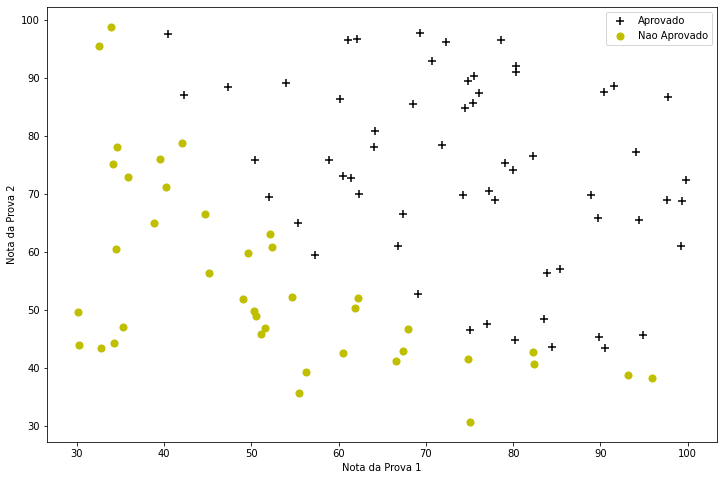

In [ ]:
filename='target/plot1.2.png'
plot(dados, filename)

###1.2.2 Ajuste dos modelos

Nesta seção criaremos modelos de classificação baseados nos algoritmos ***Naive Bayes***, ***Regressão Logística***, ***k-NN*** e ***Decision Tree***.

* Carga das bibliotecas e preparação dos dados para treinamento dos modelos.

In [ ]:
#Importação das classes para geração dos modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Separação dos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

* **Criação e Treinamento dos modelos**

####Ajuste do modelo ***Gaussain Naive Bayes***

Para o modelo *Naive Bayes* usamos a função `GaussianNB` em sua configuração padrão, sem sintonização de hiperparâmetros.

In [ ]:
#Gaussain Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

####Ajuste do modelo ***Regressão Logística***

No caso da regressão logística, tendo em vista uma maior gama de opções de parâmetros na função implementada na biblioteca `Scikit-Learn`, foi realizada a sintonização dos hiperparâmetros relativos à penalidade, ao número máximo de iterações e do algoritmo usado na otimização (`solver`).

In [ ]:
#Criação do modelo para execução do tuning
log_reg_tun = LogisticRegression()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'penalty': ['l1', 'l2', 'none'],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'max_iter': [100, 150, 200]
         }

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(log_reg_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'max_iter': [100, 150, 200],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 's

Ao realizar o tuning para esse modelo uma série de combinações de parâmetros apresentou alertas, por isso, realizamos a análise complementar dos detalhes das saídas na célula abaixo.

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.6324555320336759 {'solver': 'saga', 'penalty': 'l1', 'max_iter': 150}
0.31622776601683794 {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200}
0.27386127875258304 {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200}
0.31622776601683794 {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 200}
0.31622776601683794 {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200}
nan {'solver': 'sag', 'penalty': 'l1', 'max_iter': 150}
0.31622776601683794 {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 100}
0.6324555320336759 {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100}
0.6324555320336759 {'solver': 'saga', 'penalty': 'none', 'max_iter': 150}
0.4472135954999579 {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200}
nan {'solver': 'sag', 'penalty': 'l1', 'max_iter': 200}
0.6324555320336759 {'solver': 'saga', 'penalty': 'l1', 'max_iter': 200}
0.6324555320336759 {'solver': 'saga', 'penalty': 'none', 'max_iter': 200}
nan {'solver': 'newton-cg', 'penalty': 'l1', 'max_iter': 

Apesar dos alertas e de algumas opções com resultado nulo (nan) para a métrica de comparação, a maioria das iterações chegou a composições de parâmetros comparáveis, por isso, continuamos com nas seções a seguir com o uso do modelo selecionado.

---

Nas células a seguir realizarmos a exibição dos parâmetros selecionados e em seguida criamos o modelo baseado no *tuning* de parâmetros.

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Modelo sem tuning
#log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train.ravel()

#Modelo com tuning
log_reg = randomGrd_search.best_estimator_

####Ajuste do modelo ***k-NN***

Para o modelo ***k-NN*** foi realizada a sintonização de hiperparâmetros de forma similar à seção em que o algoritmo foi usado para regressão, ou seja, buscando analisar um valor adequado para o hiperparâmetro $k$.

In [ ]:
#Criação do modelo sem parâmetros para realizar tuning
knn_clf_tun = KNeighborsClassifier()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'n_neighbors': [5, 10, 15, 20, 25, 30]}

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(knn_clf_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

A sintonização ocorrem sem problemas, exceto pelo alerta relativo ao número de iterações do próprio `RandomizedSearchCV`, mas esta situação foi tratada pela própria função que limitou as iterações ao necessário pela quantidade de opções a serem avaliadas.

---

Nas células a seguir é apresentando o valor indicado para $k$ e em seguia gerado o modelo com base na sintonização executada.

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'n_neighbors': 15}

In [ ]:
#Modelo sem tuning
#k-NN
#k = 3
#knn_clf = KNeighborsClassifier(n_neighbors=k)
#knn_clf.fit(X_train, y_train)

#Modelo com tuning
knn_clf = randomGrd_search.best_estimator_

####Ajuste do modelo ***Decision Tree***

O modelo da árvore de decisão para classificação também foi gerado com a sintonização de hiperparâmetros, buscando um valor adequado da profundidade da árvore.

In [ ]:
#Criação do modelo sem parâmetros para realizar tuning
dtree_clf_tun = DecisionTreeClassifier()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'max_depth': [2, 3, 4, None]
         }

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(dtree_clf_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

Nas células a seguir é apresentando o valor indicado para profunidade da árvore (`max_depth`) e em seguia gerado o modelo.

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'max_depth': None}

In [ ]:
#Modelo sem tuning
#dtree_clf = DecisionTreeClassifier(max_depth=3)
#dtree_clf.fit(X_train, y_train)

#Modelo com tuning
dtree_clf = randomGrd_search.best_estimator_

###1.2.3 Avaliação dos modelos

Carga de métricas da bibliotca Scikit-Learn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

####Avaliação do modelo ***Gaussian Naive Bayes***

Com o modelo treinado na seção anterior, realizamos a seguir a predição das classes: $y=1$: Aprovado ou $y=0$: Reprovado

In [ ]:
#Predição com modelo Gaussian Naive Bayes
gnb_pred = gnb_clf.predict(X_test)
gnb_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

Como pode ser visto na matriz de confusão. Os resultados predominantes estão são de verdadeiros positivos (9 ocorrências) e verdadeiros negativos (7 ocorrências). A visualização do mapa de calor da matriz de confusão, facilita esta análise, pela apresentação de concentração de cores mais escuras (maior densidade de valores) nos quadrantes correspondentes ao encontro entre a classe real e a classe prevista. Contudo, ainda há ocorrências em proporção relevante para o tamanho do conjunto de dados classificados como falsos positivos ou falsos negativos.

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Gaussian Naive Bayes'
cm = confusion_matrix(y_test, gnb_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 3 | TP: 9


In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])
cm_reorganizada

array([[9, 3],
       [1, 7]])

In [ ]:
cm_reorganizada.shape

(2, 2)

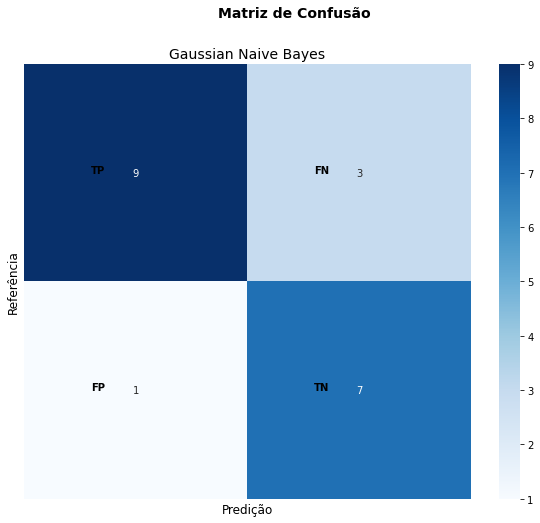

In [ ]:
#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.1.png')

A seguir é apresentado um relatório da classificação com métricas relevantes para o aprofundamento na avaliação do resultado das predições do modelo.

In [ ]:
#Relatório da classificação
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



####Avaliação do modelo ***Regressão Logística***

In [ ]:
#Predição com modelo Regressão Logística
log_reg_pred = log_reg.predict(X_test)
log_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Regressão Logística'
cm = confusion_matrix(y_test, log_reg_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 2 | TP: 10


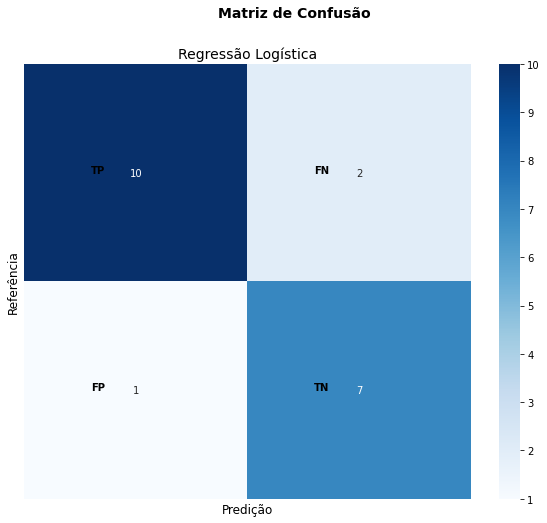

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.2.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



####Avaliação do modelo ***k-NN***

In [ ]:
#Predição com modelo k-NN
knn_clf_pred = knn_clf.predict(X_test)
knn_clf_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'k-NN'
cm = confusion_matrix(y_test, knn_clf_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 2 | TP: 10


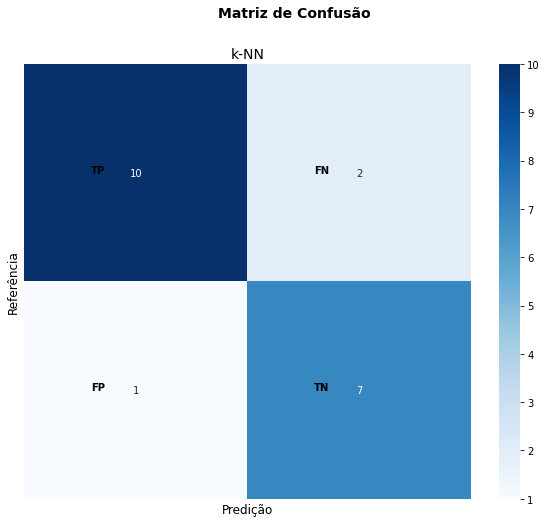

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.3.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, knn_clf_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



####Avaliação do modelo ***Decision Tree***

In [ ]:
#Predição com modelo Decision Tree
dtree_pred = dtree_clf.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Decision Tree'
cm = confusion_matrix(y_test, dtree_pred)

In [ ]:
cm

array([[7, 1],
       [3, 9]])

In [ ]:
cm.shape

(2, 2)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 3 | TP: 9


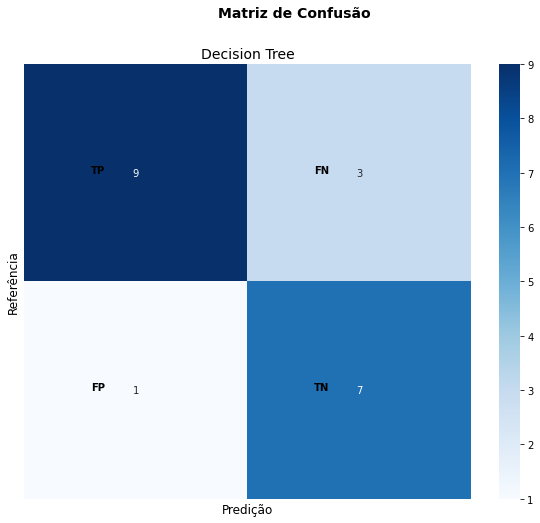

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.4.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



###1.2.4 Mapeamento de características

A fim de analisarmos possibilidades de melhoria no modelo de ***Regressão Logística***, experimentaremos a seguir a realização do mapeamento de características. Para isso, será realizada a criação de novas características a partir de polinômios criados com base nos valores originais de $X$ em um espaço dimensional maior.

In [ ]:
#Biblioteca para geração de características polinomiais
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Cria objeto para mapeamento de características
grau = 6
poly = PolynomialFeatures(grau)

In [ ]:
#Aplicação da transformação no conjunto de dados estudado
X_poly = poly.fit_transform(X)


Como pode ser visto nas saídas abaixo o conjunto de dados originais que tinha dimensão $100x2$ agora é representado pelas características mapeadas com dimensão $100x28$, ou seja, cada exemplo representa um vetor com 28 dimens~]oes.

In [ ]:
print('Dimensões dos conjuntos de dados')
print('-'*40)
print(f'Características originais: {X.shape}\nCaracterísticas mapeadas:  {X_poly.shape}')

Dimensões dos conjuntos de dados
----------------------------------------
Características originais: (100, 2)
Características mapeadas:  (100, 28)


A listagem a seguir, por sua vez, exibe o primeiro registro dos dados originais e dos valores mapeados.

In [ ]:
#Conferindo os valores originais (primeiros registros)
X[:1]

array([[34.62365962, 78.02469282]])

In [ ]:
#Conferindo os valores mapeados (primeiros registros)
X_poly[:1]

array([[1.00000000e+00, 3.46236596e+01, 7.80246928e+01, 1.19879781e+03,
        2.70150041e+03, 6.08785269e+03, 4.15067672e+04, 9.35358305e+04,
        2.10783739e+05, 4.75002836e+05, 1.43711618e+06, 3.23855276e+06,
        7.29810445e+06, 1.64463365e+07, 3.70619504e+07, 4.97582214e+07,
        1.12130548e+08, 2.52687084e+08, 5.69432357e+08, 1.28322035e+09,
        2.89174729e+09, 1.72281172e+09, 3.88236994e+09, 8.74895160e+09,
        1.97158321e+10, 4.44297848e+10, 1.00122874e+11, 2.25627694e+11]])

Separação do conjunto de treinamento e testes

In [ ]:
#Divisão dos valores em treino e teste
#OBSERVAÇÃO: random_state está sendo usado para reprodutibilidade dos resultados
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

* Criação de um novo modelo de ***Regressão Logística*** baseada nas características mapeadas.

In [ ]:
#Criação do modelo base para sintonização de parâmetros
reg_log_poly_tun = LogisticRegression()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'penalty': ['l1', 'l2', 'none'],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'max_iter': [100, 150, 200]
         }

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(reg_log_poly_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(Xp_train, yp_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'max_iter': [100, 150, 200],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 's

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

nan {'solver': 'newton-cg', 'penalty': 'l1', 'max_iter': 150}
0.6123724356957945 {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100}
0.6123724356957945 {'solver': 'sag', 'penalty': 'l2', 'max_iter': 200}
nan {'solver': 'sag', 'penalty': 'l1', 'max_iter': 200}
0.6123724356957945 {'solver': 'saga', 'penalty': 'l2', 'max_iter': 150}
0.6123724356957945 {'solver': 'sag', 'penalty': 'none', 'max_iter': 100}
0.19364916731037085 {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100}
0.15811388300841897 {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200}
nan {'solver': 'sag', 'penalty': 'l1', 'max_iter': 100}
0.15811388300841897 {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100}
0.22360679774997896 {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200}
0.6123724356957945 {'solver': 'sag', 'penalty': 'none', 'max_iter': 150}
0.22360679774997896 {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 150}
0.22360679774997896 {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200}
0.2

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Modelo com tuning
reg_log_poly = randomGrd_search.best_estimator_

In [ ]:
#Predição com modelo Regressão Logística
y_pred_poly = reg_log_poly.predict(Xp_test)
y_pred_poly

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Regressão Logística com Características Polinomiais'
cm = confusion_matrix(y_test, y_pred_poly)
tn, fp, fn, tp = cm.ravel()

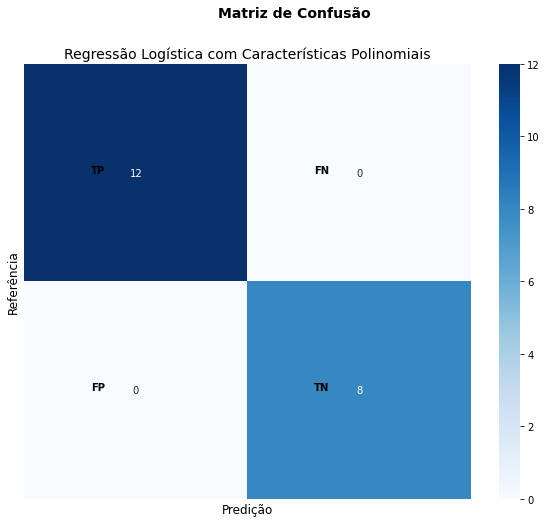

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.4.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Com a combinação de mapeamento de características e sintonização de hiperparâmetros chegou-se a um modelo que acertou todas as classificações previstas nos rótulos. Isso é evidenciado pela matriz de confusão e pelo relatório de classificação apresentados nas células anteriores.

---

Este comportamento, apesar de aparentemente positivo, pode significar sobreajuste do modelo ao conjunto de dados e prejudicar a capacidade de generalização do modelo. Na próxima seção avaliaremos como fica a fronteira de decisão do modelo e em seguida analisar maneiras de lidar com o sobreajuste.

###1.2.5 Esboço da fronteira de decisão

A fronteira de decisão permite identificar no conjunto de dados as fronteiras identificadas pelo classificador treinado para separação as classes existentes.

---

Para relembrar os dados e identificar a probabilidade de classificação das classes, exibimos abaixo a previsão de probabilidade no conjunto de testes e em seguida exibimos as estatísticas descritivas dos dados do conjunto original.

In [ ]:
#Predição com modelo Regressão Logística
y_proba_poly = reg_log_poly.predict_proba(Xp_test)
y_proba_poly

array([[1.16157147e-01, 8.83842853e-01],
       [1.00000000e+00, 3.85532644e-18],
       [1.00000000e+00, 9.64159340e-13],
       [9.02697163e-01, 9.73028369e-02],
       [9.99999999e-01, 5.86076715e-10],
       [1.00000000e+00, 1.92949825e-20],
       [9.99999999e-01, 9.28008312e-10],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999985e-01, 1.52487030e-08],
       [1.00000000e+00, 1.44736373e-19],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [4.40674919e-04, 9.99559325e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.09923032e-08, 9.99999989e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [ ]:
dados.describe()

,Prova 1,Prova 2,Aprovado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Para calcular a fronteira de decisão criaremos uma função personalizada que gera uma visualização da dispersão das notas das provas 1 e 2 de maneira similar ao que foi feito na seção 1.2.1. Sobre estes dados plotados será desenhada a fronteira de decisão calculada pela aplicação do modelo *regressor* em um conjunto de dados que representa os limites (mínimo e máximo) das características originais.

Os detalhes das etapas da geração dos dados, aplicação da predição da probabilidade e construção da fronteira de decisão a partir do gráfico de contorno (função `contour` da biblioteca `matplotlib.pyplot`) estão descritos nos comentários da função abaixo.

In [ ]:
def plotFronteira(data, model, filename = 'target/plot.png'):
  
  ##PREPARAÇÃO DA FRONTEIRA DE DECISÃO
  #Cria dados com valores contidos nos limites do conjunto de dados original
  i = min(data.iloc[:, 0]) - 5
  s = max(data.iloc[:, 0]) + 5
  xx, yy = np.mgrid[i:s:.1, i:s:.1]
  grid = np.c_[xx.ravel(), yy.ravel()]

  #Realiza a transformação polinomial dos dados gerados
  grid_poly = poly.fit_transform(grid)
  #Calcula a probabilidade das classes
  probs = model.predict_proba(grid_poly)[:, 1].reshape(xx.shape)

  ##GERAÇÃO DO GRÁFICO DE DISPERSÃO
  #Separação dos valores das classes
  positivo = data[data['Aprovado'].isin([1])]
  negativo = data[data['Aprovado'].isin([0])]

  #Gerando o grafico de dispersao para analise preliminar dos dados
  fig, ax = plt.subplots(figsize=(12,8))

  ax.scatter(positivo['Prova 1'], positivo['Prova 2'],
             s=50, c='k', marker='+', label='Aprovado')
  
  ax.scatter(negativo['Prova 1'], negativo['Prova 2'],
             s=50, c='y', marker='o', label='Nao Aprovado')
  
  ##PLOTAGEM DA FRONTEIRA DE DECISÃO
  ax.contour(xx, yy, probs, levels=[0.5],
             colors=['r'])
  
  ##CONFIGURAÇÕES VISUAIS ADICIONAIS
  ax.legend()

  ax.set_xlabel('Nota da Prova 1')
  ax.set_ylabel('Nota da Prova 2')
  sns.despine()

  ##GRAVAÇÃO DO RESULTADO
  if not os.path.exists(os.path.dirname(filename)):
    os.makedirs(os.path.dirname(filename))

  
  plt.savefig(filename)
  plt.show() 

Ao executarmos a função ao nosso conjunto de dados estudado, percebemos que a fronteira de decisão consegue separar de maneira adequada as classes $y=1$: Aprovado e $y=0$: Reprovado.

---

O ponto de atenção para este modelo é o risco de sobreajustamento, pois a fronteira de decisão contorna de maneira praticamente perfeita o conjunto de dados analisado. Isto já foi percebido na seção anterior quando analisamos a matriz de confusão e o relatório de classificação do modelo.

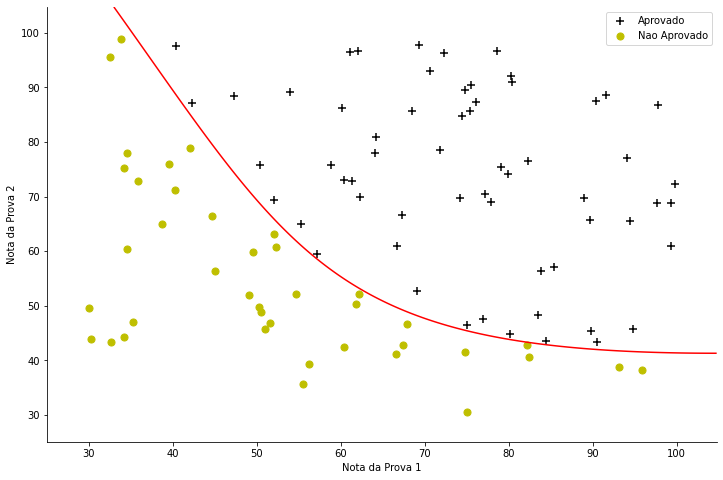

In [ ]:
model = reg_log_poly
filename='target/plot1.2.5.png'
plotFronteira(dados, model, filename)

##1.3 Regularização

Carga do conjunto de dados e análise prévia

In [ ]:
import scipy.io as spio
arquivo = 'data/ex5data1.mat'
data = spio.loadmat(arquivo,
                    squeeze_me=True)

In [ ]:
data

{'X': array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
        -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
          1.38915437, -44.38375985,   7.01350208,  22.76274892]),
 'Xtest': array([-33.31800399, -37.91216403, -51.20693795,  -6.13259585,
         21.26118327, -40.31952949, -14.54153167,  32.55976024,
         13.39343255,  44.20988595,  -1.14267768, -12.76686065,
         34.05450539,  39.22350028,   1.97449674,  29.6217551 ,
        -23.66962971,  -9.01180139, -55.94057091, -35.70859752,
          9.51020533]),
 'Xval': array([-16.74653578, -14.57747075,  34.51575866, -47.01007574,
         36.97511905, -40.68611002,  -4.47201098,  26.53363489,
        -42.7976831 ,  25.37409938, -31.10955398,  27.31176864,
         -3.26386201,  -1.81827649, -40.7196624 , -50.01324365,
        -17.41177155,   3.5881937 ,   7.08548026,  46.28236902,
         14.61228909]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov

In [ ]:
X_train = np.array(data['X'])
y_train = np.array(data['y'])

In [ ]:
X_val = np.array(data['Xval'])
y_val = np.array(data['yval'])

In [ ]:
X_test =  np.array(data['Xtest'])
y_test = np.array(data['ytest'])

###1.3.1 Visualização dos dados

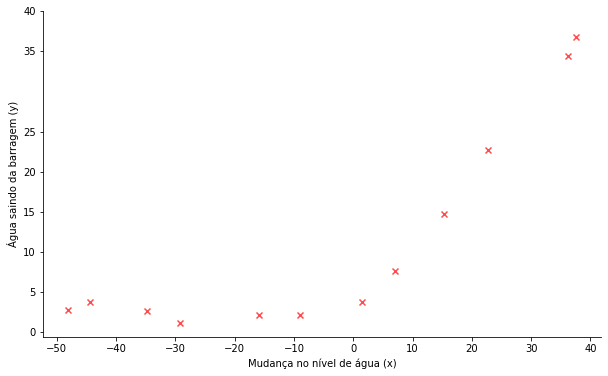

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train,
            color='r', alpha=0.7,
            marker='x')

plt.xlabel('Mudança no nível de água (x)')
plt.ylabel('Água saindo da barragem (y)')

plt.yticks([0,5,10,15,20,25,35,40])
plt.xticks([-50,-40,-30,-20,-10,0,10,20,30,40,])

sns.despine()

plt.savefig('target/plot1.3.1.png')

###1.3.2 Ajuste de um Regressor Linear

Criação do modelo de Regressão Linear

In [ ]:
#Importação da classe do Scikit-Learn e criação do objeto com o regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Com o modelo gerado é possível carregar os coeficientes da regressão linear

In [ ]:
#Extrair coeficientes
inclinacao = lin_reg.coef_
intersecao = lin_reg.intercept_
theta = np.array([intersecao, inclinacao[0]])

In [ ]:
# imprimir os valores encontrados para os parâmetros
print(f'Vetor de parâmetros: {theta}')
print(f'Equação:             Ŷ = {intersecao:.3f} + {inclinacao[0]:.3f} * X')

Vetor de parâmetros: [13.08790351  0.36777923]
Equação:             Ŷ = 13.088 + 0.368 * X


Com o modelo criado, temos os parâmetros da equação da reta de ajustamento, conforme segue:

$
\hat{Y}=\theta_0 + \theta_1x
$

$
\hat{Y}=13.088 + 0.368x
$

---

Como pode ser visto na visualização da dispersão dos atributos com a reta de ajustamento da ***Regressão Linear*** o modelo não apresenta uma capacidade preditiva adequada. Aparentemente o modelo está *subajustado*.

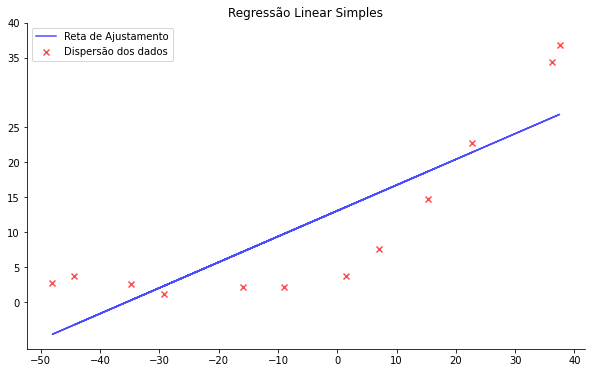

In [ ]:
#Plotar pontos e retas com parâmetros otimizados
plt.figure(figsize=(10,6))

plt.scatter(X_train, y_train, 
            color='r', alpha=0.7,
            marker='x')
plt.plot(X_train, (X_train * inclinacao + intersecao), color='b', alpha=0.7)
plt.legend(['Reta de Ajustamento', 'Dispersão dos dados'])
plt.title('Regressão Linear Simples')

plt.yticks([0,5,10,15,20,25,35,40])
plt.xticks([-50,-40,-30,-20,-10,0,10,20,30,40,])

sns.despine()
plt.savefig('target/plot1.3.2.png')

###1.3.3 Curvas de aprendizado

O trecho a seguir realiza o uso da função `learning_curve` da biblioteca Scikit-Learn para cálculos os dados para visualização da curva de aprendizagem, que demonstra o nível de erro do modelo à medida que são alteradas as quantidades de observações no conjunto de treinamento e validação.

Contudo, neste exemplo, os dados não são os mais adequados, pois nosso conjunto de dados já estava separado entre treinamento e validação, mas a função espera receber um conjunto de dados com os exemplos de teste e validação, pois implementa esta divisão de maneira interna para os dados fornecidos. Como passamos o conjunto de treinamento, a função considerou como conjunto de validação parte dos dados que já foram usados para treinamento do modelo.

In [ ]:
#Biblioteca para cálculo da curva de aprendizado
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
qtds_exemplos, erros_treino, erros_val = learning_curve(lin_reg,
                                                        X_test.reshape(-1,1),
                                                        y_test.reshape(-1,1),
                                                        scoring='neg_mean_squared_error',
                                                        train_sizes=train_sizes
                                                        )

In [ ]:
#Cálculo dos erros baseado na média dos treinamentos
erros_t = np.mean(-erros_treino, axis=1)
erros_v = np.mean(-erros_val, axis=1)

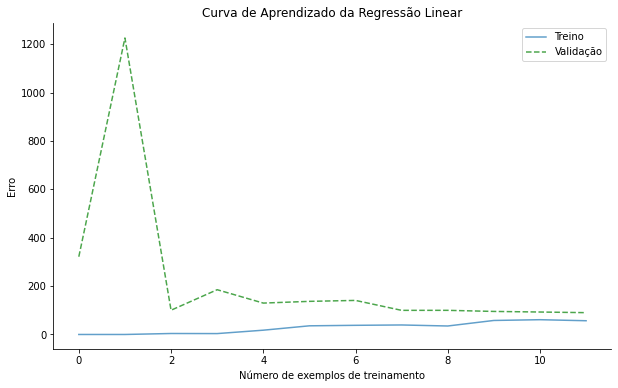

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(erros_t, alpha=0.7)
plt.plot(erros_v, 'g--', alpha=0.7)

plt.legend(['Treino', 'Validação'])
plt.xlabel('Número de exemplos de treinamento')
plt.ylabel('Erro')
plt.title('Curva de Aprendizado da Regressão Linear')

plt.savefig('target/plot1.3.3.1.png')
sns.despine()

Na célula abaixo é realizada uma implementação do zero do cálculo da curva de aprendizado que recebe os dados previamente divididos em treinamento e validação. Em seguida a implementação é usada para geração da curva de aprendizado do modelo de **Regressão Linear**.

In [ ]:
#Bibliotecas implementadas a partir de https://github.com/MLRG-CEFET-RJ/ml-class
from custo_reglin_regularizada import custo_reglin_regularizada
from gd_reglin_regularizada import gd_reglin_regularizada

#Biblioteca para otimização da função de custo
import scipy.optimize as opt


def encontrar_theta_otimo(theta, X, y, _lambda):
  """
  Função para aplicação da função de custo e encontrar o vetor otimizado de 
  parâmetros theta
  """
  return opt.fmin_tnc(func = custo_reglin_regularizada,
                      x0=theta, fprime=gd_reglin_regularizada,
                      args=(X, y, _lambda))
    
def learningCurve(theta, X, y, X_val, y_val, _lambda):
  """
  Função para cálculo dos erros de treino e validação para uso como
  elementos para visualização da curva de aprendizado
  """
  m = len(X)
  erros_treino = np.zeros(m)
  erros_val = np.zeros(m)
  qtds_exemplos = []
  
  for i in range(1,m+1):
      X_train = X[:i,:]
      y_train = y[:i]
      qtds_exemplos.append(len(X_train))
      
      result = encontrar_theta_otimo(theta, X_train, y_train, _lambda)
      theta = result[0]
      
      J_train = custo_reglin_regularizada(theta, X_train, y_train, _lambda=0)
      J_val = custo_reglin_regularizada(theta, X_val, y_val, _lambda)
      
      erros_treino[i-1] = J_train
      erros_val[i-1] = J_val
  
  return qtds_exemplos, erros_treino, erros_val

In [ ]:
#Parâmetros da função
lamb=0 #Lambda zerada para não efetuar regularização
theta = np.array([[1,1]]).T #inicialização do vetor theta

#Organização das dimensões dos valores de treino e validação
X_val_ = np.array(data['Xval'], ndmin=2).T
X_val_ = np.c_[np.ones((X_val_.shape[0], 1)), X_val_]
y_val_ = np.array(data['yval'], ndmin=2).T

X_train_ = np.array(data['X'], ndmin=2).T
X_train_ = np.c_[np.ones((X_train_.shape[0], 1)), X_train_]
y_train_ = np.array(data['y'], ndmin=2).T

In [ ]:
qtds_exemplos, erros_treino, erros_val = learningCurve(theta,
                                                       X_train_, y_train_,
                                                       X_val_, y_val_,
                                                       lamb)

print(f'Quantidade de exempos: {qtds_exemplos}\n\nErros de treino: {erros_treino}\n\nErros de validação: {erros_val}')

Quantidade de exempos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Erros de treino: [8.63153419e-18 6.09573022e-18 3.28659505e+00 2.84267769e+00
 1.31540488e+01 1.94439625e+01 2.00985217e+01 1.81728587e+01
 2.26094054e+01 2.32614616e+01 2.43172496e+01 2.23739065e+01]

Erros de validação: [169.87070841 110.30036593  45.01023162  48.36891133  35.86516478
  33.82996162  31.97098581  30.86244633  31.13599796  28.93620747
  29.55143162  29.43381813]


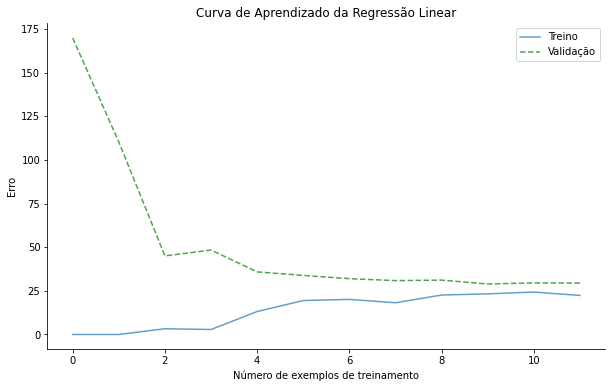

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(erros_treino, alpha=0.7)
plt.plot(erros_val, 'g--', alpha=0.7)

plt.legend(['Treino', 'Validação'])
plt.xlabel('Número de exemplos de treinamento')
plt.ylabel('Erro')
plt.title('Curva de Aprendizado da Regressão Linear')

plt.savefig('target/plot1.3.3.2.png')
sns.despine()

É possível perceber que os erros no conjunto de treino começam muito inferiores aos encontrados no conjunto de validação e vão convergindo para o mesmo nível à medida que o número de exemplos aumenta. Contudo, mesmo quando encontram um nível similar a um platô ainda há um *gap* entre as duas curvas, mostrando que o modelo erra menos no conjunto de treino.

**OBSERVAÇÃO**: A segunda curva ilustra de maneira mais correta a mudança do nível de erro da aplicação do modelo no conjunto de treinamento e validação fornecidos pelo conjunto de dados analisado. Na geração da curva através da função carregada da bibliotca *Scikit-Learn* forçamos a quantidade de exemplos para igualar aos tamanhos obtidos na função personalizada para melhorar a capacidade de comparação, isso foi feito definindo manualmente o parâmetro `train_sizes`.

###1.3.4 Ajuste de um regressor polinomial não-regularizado

Para lidar com o problema do subajustamento usamos a abordagem de mapeamento de novas características usando a classe `PolynomialFeatures` do Scikit-Learn.

In [ ]:
#Importação da classe com o transformador
from sklearn.preprocessing import PolynomialFeatures

#Criação do transformador para mapeamento de características polinomiais
grau = 8
poly = PolynomialFeatures(grau)

In [ ]:
#Exibição dos dados originais de X
X_train.reshape(12,1)

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [ ]:
#Aplicação do transformar e conferência de valores gerados
X_poly = poly.fit_transform(X_train.reshape(12,1))
X_poly[:1]

array([[ 1.00000000e+00, -1.59367581e+01,  2.53980260e+02,
        -4.04762197e+03,  6.45059724e+04, -1.02801608e+06,
         1.63832436e+07, -2.61095791e+08,  4.16102047e+09]])

Como os valores gerados pelos polinômios estão em escalas diferentes, será realizada a normalização dos valores antes de treinar o novo modelo.

In [ ]:
#Importação da classe com o transformador
from sklearn.preprocessing import StandardScaler

#Criação do transformador para normalização de características
#Este transformador usa o algoritmo Z-Score
normalizar_caracteristica = StandardScaler()

In [ ]:
X_norm = normalizar_caracteristica.fit_transform(X_poly)

Valores da média e desvio padrão usados na transformação guardados para uso posterior no uso do modelo para apresentação da curva de ajustamento da regressão.

In [ ]:
X_norm_mean = normalizar_caracteristica.mean_
X_norm_std = normalizar_caracteristica.scale_
print(X_norm_mean, '\n\n', X_norm_mean)

[ 1.00000000e+00 -5.08542635e+00  8.48904834e+02 -1.28290173e+04
  1.28967789e+06 -2.98314592e+07  2.29330301e+09 -6.84527284e+10
  4.42233759e+12] 

 [ 1.00000000e+00 -5.08542635e+00  8.48904834e+02 -1.28290173e+04
  1.28967789e+06 -2.98314592e+07  2.29330301e+09 -6.84527284e+10
  4.42233759e+12]


Uso das características polinomiais normalizadas para treinar um novo modelo de **Regressão Linear Polinomial**.

In [ ]:
#Importação da classe do Scikit-Learn e criação do objeto com o regressor
from sklearn.linear_model import LinearRegression
lin_reg_poly = LinearRegression()

In [ ]:
lin_reg_poly.fit(X_norm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Geração do vetor de parâmetros $\theta$ otimizados a partir dos dados gerados pelo modelo treinado.

In [ ]:
theta_ = lin_reg_poly.coef_

In [ ]:
theta_

array([  0.        ,   9.13124818,  18.17727033,  28.9301793 ,
       -27.23824133, -74.47076142,   6.77178106,  60.68644113,
        20.63841717])

In [ ]:
lin_reg_poly.intercept_

11.217589325366374

In [ ]:
theta_ = np.insert(theta_, 0, lin_reg_poly.intercept_)

In [ ]:
theta_

array([ 11.21758933,   0.        ,   9.13124818,  18.17727033,
        28.9301793 , -27.23824133, -74.47076142,   6.77178106,
        60.68644113,  20.63841717])

Visualização do modelo de ***Regressão Polinomial*** para predição do $y$.

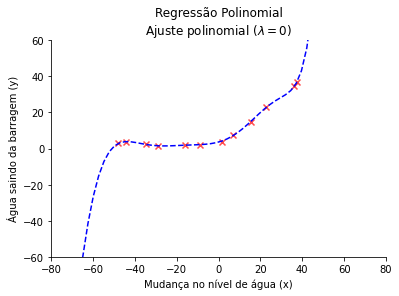

In [ ]:
#Preparação dos valores para gerar curva de ajustamento da regressão
x = np.linspace(-65,60,50)
x = x.reshape((len(x),1))
x_poli = poly.fit_transform(x)

#Transformação usando a média e desvio padrão usando na normalização
x_poli = (x_poli - X_norm_mean) / X_norm_std
x_poli = np.insert(x_poli, 0, 1, axis=1)

h = x_poli.dot(np.matrix(theta_).T)

#Plotar dispersão dos dados
plt.scatter(X_train, y_train,
            color='r', alpha=0.7,
            marker='x')

plt.title('Regressão Polinomial\nAjuste polinomial ($\lambda = 0$)')
plt.xlabel('Mudança no nível de água (x)')
plt.ylabel('Água saindo da barragem (y)')

#Plotar Regressão
plt.plot(x, h, 'b--')

plt.axis((-80,80,-60,60))
sns.despine()

plt.savefig('target/plot1.3.4.1.png')

Como pode ser observada na visualização o modelo se ajusta perfeitamente aos dados analisados. Contudo esse comportamento pode demonstrar *sobreajuste* aos dados de treinamento, prejudicando a capacidade de generalização do modelo.

---

Para continuar a análise será apresentada a curva de aprendizado para este modelo polinomial, mas para minimizar o problema citado na seção 1.3.3 fizemos a concatenção dos conjuntos de treinamento e validação nas células a seguir. Desta forma, o algoritmo da classe `learning_curve` de cálculo da curva de aprendizado pode fazer sua própria separação dos exemplos de treinamento e teste para comparar os níveis de erro.

In [ ]:
#Mapeamento das características polinomiais
X_poli_val = poly.fit_transform(X_val.reshape(21,1))

#Aplicação da normalização
X_norm_val = normalizar_caracteristica.fit_transform(X_poli_val)
X_norm_val[0]

array([ 0.        , -0.42416069, -0.75311565,  0.12753599, -0.7369401 ,
        0.24552665, -0.63413413,  0.26698715, -0.55310478])

* A seguir conferimos das dimensões dos conjuntos de treinamento e validação originais do conjunto de dados antes de realizar a concatenção.
* Com as dimensões conferidas realizamos a concatenação

In [ ]:
print(X_norm_val.shape, X_norm.shape)

(21, 9) (12, 9)


In [ ]:
#Concatenção das características (X)
X_ = np.concatenate((X_norm, X_norm_val))
X_.shape

(33, 9)

In [ ]:
print(y_train.shape, y_val.shape)

(12,) (21,)


In [ ]:
#Concatenção da variável algo (y)
y_ = np.concatenate((y_train, y_val))
y_.shape

(33,)

Cálculo dos erros de treinamento e validação e visualização da curva de aprendizagem.

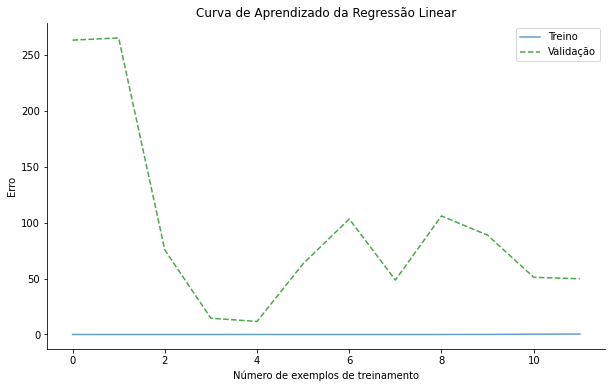

In [ ]:
train_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
qtds_exemplos, erros_treino, erros_val = learning_curve(lin_reg_poly,
                                                        #X_norm_val, y_val.reshape(-1,1),
                                                        #X_norm, y_train.reshape(-1,1),
                                                        X_, y_,
                                                        scoring='neg_mean_squared_error',
                                                        train_sizes=train_sizes
                                                        )

#Cálculo dos erros baseado na média dos treinamentos
erros_t = np.mean(-erros_treino, axis=1)
erros_v = np.mean(-erros_val, axis=1)

plt.figure(figsize=(10,6))

plt.plot(erros_t, alpha=0.7)
plt.plot(erros_v, 'g--', alpha=0.7)

plt.legend(['Treino', 'Validação'])
plt.xlabel('Número de exemplos de treinamento')
plt.ylabel('Erro')
plt.title('Curva de Aprendizado da Regressão Linear')

plt.savefig('target/plot1.3.4.2.png')
sns.despine()

Para reforçar esta análise, plotamos a curva de aprendizado que demonstra que o modelo possui erros de treinamento muito baixos, se aproximando de 0, mas elevados níveis de erro de validação que reduzem ao longo do tempo, mas são inconstantes (aumentando e reduzindo em tamanhos diferentes de exemplos de treinamento) e se aproximam do nível de erro de treinamento em raras ocasiões, mas nunca se igualam ou melhoram em relação a estes erros de treinamento.

###1.3.5 Ajuste de um regressor polinomial regularizado

Para solucionar o problema de *sobreajuste* serão gerados regressores com regularização. Esta abordagem consiste no uso de um parâmetro que impõe uma penalidade à função de custos da regressão.

In [ ]:
from sklearn.model_selection import GridSearchCV
#Quantidade de camadas para validação cruzada
cv = 5

#Hiperparâmetros para tuning
param_grid = [
              {'alpha': [1.25, 1.5, 1.75, 2]}
              ]

####Regularização Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()

In [ ]:
#Execução do tuning de hiperparâmetros
grid_search = GridSearchCV(ridge_reg, param_grid, cv=cv,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_norm, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [1.25, 1.5, 1.75, 2]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 1.25}

In [ ]:
print('RMSE do melhor estimador:')
np.sqrt(-grid_search.best_score_)

RMSE do melhor estimador:


3.020398609371885

In [ ]:
ridge_reg_ = grid_search.best_estimator_

####Regularização Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()

In [ ]:
#Execução do tuning de hiperparâmetros
grid_search = GridSearchCV(lasso_reg, param_grid, cv=cv,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_norm, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [1.25, 1.5, 1.75, 2]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 1.25}

In [ ]:
print('RMSE do melhor estimador:')
np.sqrt(-grid_search.best_score_)

RMSE do melhor estimador:


3.1913917962842993

In [ ]:
lasso_reg_ = grid_search.best_estimator_

Ao realizar a sintonização do hiperparâmetro, encontramos $\alpha = 1.25$, tanto para regularização *Ridge* quanto para regularização *Lasso*. O erro encontrado para *Ridge* foi **RMSE** = 3.020, enquanto *Lasso* apresentou **RMSE** = 3.191.

Cabe ressaltar que em difentes composições de valores para serem testados no `GridSearchCV`, sempre foi escolhido o menor valor do dicionário usado na variável `param_grid`. Foram realizados experimentos inicialmente com seguintes valores:
* i de 0 a 1.5 em intervalos de 0.5;
* ii de 0.5 a 1.5 com intervalores de 0.25;
* iii de 1 a 2 com intervalores de 0.25;
* iv Finalmente foi usado os valores que ficaram nos experimentos acima (1.25 a 2). Essa escolha foi feita porque o valor 1 já é o padrão e ao adicioná-la nas opções i e ii era indicado um parâmetro que levaria a uma menor regularização e na opção iii o resultado equivaleria a simplesmente usar o algoritmo em uma forma padrão (sem sintonização de hiperparâmetros).

####Comparação da curva de aprendizado

Com os modelos treinados com base no hiperparâmetro já otimizado na etapa anterior, usamos os modelos regularizados para plotar a curva de aprendizado de ambos modelos.

In [ ]:
#Curva de aprendizado Ridge
qtds_exemplos, erros_treinoRidge, erros_valRidge = learning_curve(ridge_reg_,
                                                        X_, y_,
                                                        scoring='neg_mean_squared_error',
                                                        #train_sizes=train_sizes
                                                        )

#Curva de aprendizado Lasso
qtds_exemplos, erros_treinoLasso, erros_valLasso = learning_curve(lasso_reg_,
                                                        X_, y_,
                                                        scoring='neg_mean_squared_error',
                                                        #train_sizes=train_sizes
                                                        )

In [ ]:
#Cálculo dos erros baseado na média dos treinamentos
erros_treinoRidge = np.mean(-erros_treinoRidge, axis=1)
erros_valRidge = np.mean(-erros_valRidge, axis=1)

erros_treinoLasso = np.mean(-erros_treinoLasso, axis=1)
erros_valLasso = np.mean(-erros_valLasso, axis=1)

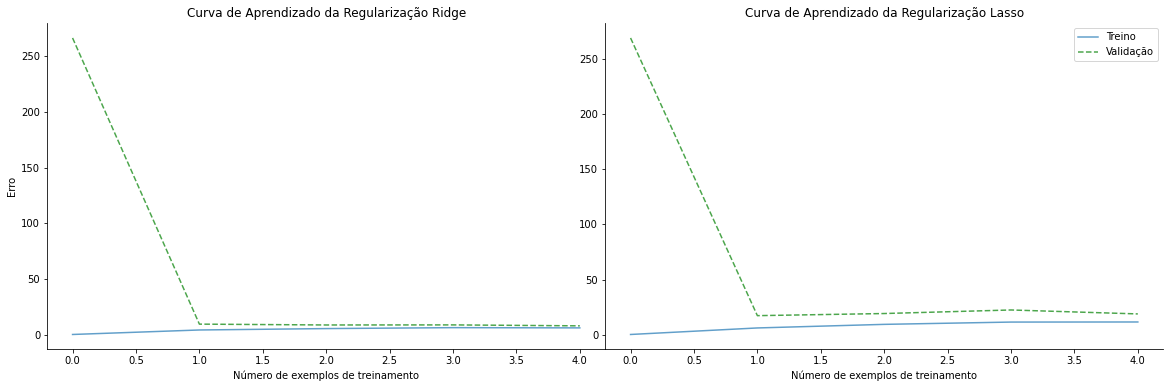

In [ ]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Curva de aprendizado da Regressão Regularizada Ridge
ax1.plot(erros_treinoRidge, alpha=0.7)
ax1.plot(erros_valRidge, 'g--', alpha=0.7)

#ax1.legend(['Treino', 'Validação'])
ax1.set_xlabel('Número de exemplos de treinamento')
ax1.set_ylabel('Erro')
ax1.set_title('Curva de Aprendizado da Regularização Ridge')

#Curva de aprendizado da Regressão Regularizada Lasso
ax2.plot(erros_treinoLasso, alpha=0.7)
ax2.plot(erros_valLasso, 'g--', alpha=0.7)

#Rótulos e legendas dos gráficos
ax2.legend(['Treino', 'Validação'])
ax2.set_xlabel('Número de exemplos de treinamento')
ax2.set_title('Curva de Aprendizado da Regularização Lasso')

#Ajustes visuais finais
sns.despine()
plt.subplots_adjust(wspace=0)
plt.savefig('target/plot1.3.5.1.png')

Pelas curvas de aprendizado, percebe-se um resultado ligeiramente melhor com a *Regularização Ridge*, contudo em ambos casos o nível de erros em treinamento continua muito inferior ao erros de validação nos exemplos de tamanho menores. Mesmo com a regularização efetuada não é possível chegar a uma conclusão definitiva de que este modelo teria boa capacidade de generalização e o problema de *sobreajustamento* está solucionado.

Uma possibilidade que não foi experimentada nesse trabalho em função das limitações do conjunto de dados original foi o fornecimento de mais dados para treinamento e comparação de outros modelos. Em algumas análises desta seção, sobretudo na curva de aprendizado da ***Regularização Ridge*** os erros de treinamento parecem convergir à medida que o tamanho dos exemplos aumenta, o que poderia ser uma solução para um modelo melhor. Nesta linha, ainda tentamos a abordagem de juntar os conjuntos de treinamento e validação para permitir que os algoritmos usados fizessem novas separações de subconjuntos diferentes, mas esta técnica foi limitada pelo tamanho do conjunto de dados completos.

---

Finalmente, com o melhor modelo selecionado, considerando as limitações já mencionadas, o aplicaremos para predição no subconjunto de dados de testes.

In [ ]:
#Criação de um pipeline para simplificação do mapeamento e normalização
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                     ('polyFeature', PolynomialFeatures(degree=grau)),
                     ('normFeature', StandardScaler())
                     ])

#Aplicação do pipeline de transformação nos dados de teste
X_test_norm = pipeline.fit_transform(X_test.reshape(-1,1))

In [ ]:
#Aplicação do modelo para predição dos novos valores
y_pred = ridge_reg_.predict(X_test_norm)
y_pred

array([ 2.46502217,  2.4195676 ,  2.66374081,  5.23480665, 15.62137876,
        2.42868542,  3.82810714, 24.97805201, 11.37834586, 42.15283338,
        6.3681624 ,  4.07748286, 26.63879656, 33.47580835,  7.20815243,
       22.05044271,  2.89745808,  4.68693305,  2.82533319,  2.43028097,
        9.73998543])

Ao avaliarmos o resultado no conjunto de testes obtemos $RMSE=4.057$. Ao compararmos as predições com os dados rotulados percebemos que o modelo tem boa capacidade preditiva e o ajustamento não é tão perfeito quanto no exemplo *sobreajustado* o que é uma características positiva, pois pode indicar uma melhor capacidade de generalização.

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE com conjunto de teste:')
np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

RMSE com conjunto de teste:


4.056965171181899

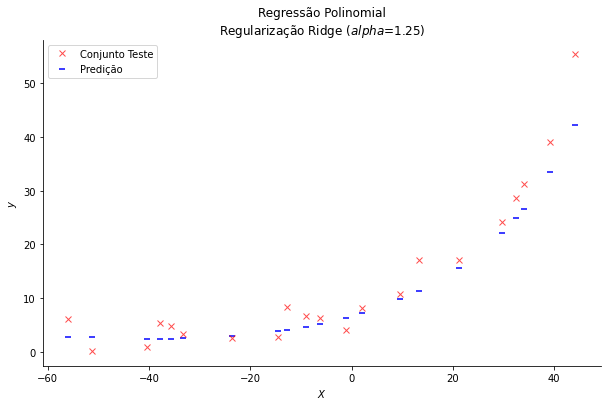

In [ ]:
plt.figure(figsize=(10,6))

#Plotagem das observações e rótulos
plt.plot(X_test, y_test, 'rx', alpha=0.7)
#Plotagem das predições
plt.scatter(X_test, y_pred, color='b', marker='_')

plt.title('Regressão Polinomial\nRegularização Ridge ($alpha$=1.25)')
plt.legend(['Conjunto Teste', 'Predição'])
plt.ylabel('$y$')
plt.xlabel('$X$')

sns.despine()
plt.savefig('target/plot1.3.5.2.png')

####Comparação final dos modelos para o conjunto de dados

A seguir realizamos uma visualização conjunta para comparação dos modelos selecionados em cada etapa para este conjunto de dados. A descrição dos detalhes da construção da visualização estão nos comentários da célula a seguir. A interpretação das visualizações pode ser vista em cada uma das etapas anteriores dessa seção. As visualizações podem estar ligeiramente diferentes dos gráficos separados porque fizemos o uso de limites nos eixos $y$ e $x$ únicos para facilitar a comparação na mesma escala, além disso as legendas e rótulos foram apresentadas apenas uma vez para deixar os gráficos mais limpos e permitir o foco da análise nos dados apresentados.

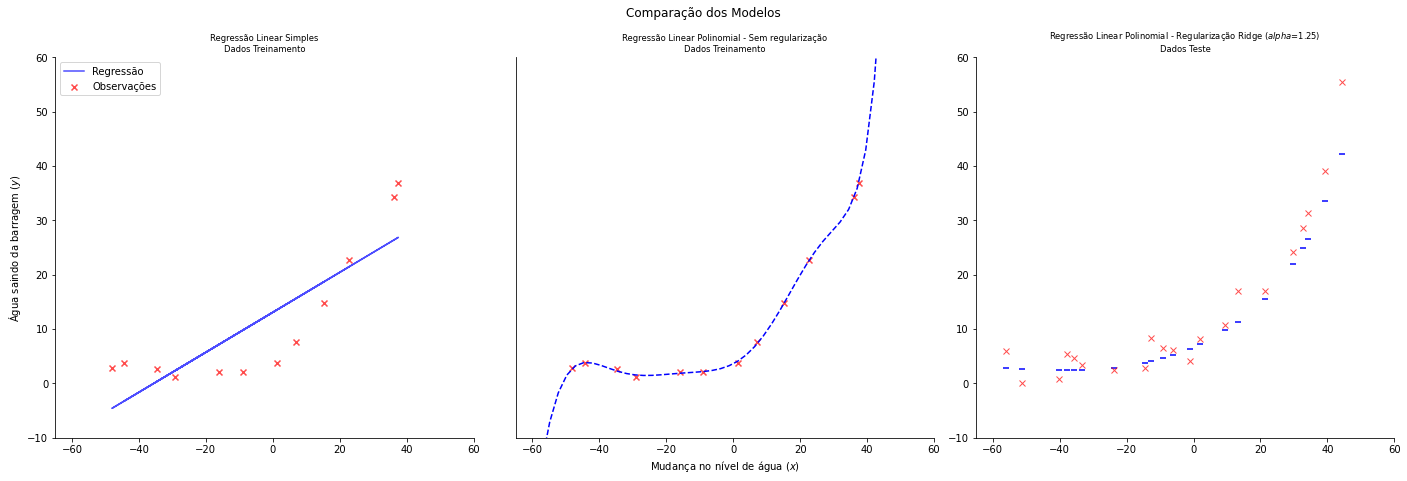

In [ ]:
##===============================================
##COMPARAÇÃO FINAL DOS MODELOS PARA O DATASET
##===============================================
#Limites dos eixos compartilhados
ylim = [-10,60]
xlim = [-65,60]

#Construção da base para subplots
fig = plt.figure(figsize=(24,7))
fig.suptitle('Comparação dos Modelos')

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


##===============================================
##Regressão Linear Simples
##===============================================
#Plotar dispersão dos dados
ax1.scatter(X_train, y_train, 
            color='r', alpha=0.7,
            marker='x')

#Plotar Regressão
ax1.plot(X_train, (X_train * inclinacao + intersecao),
         color='b', alpha=0.7)

#Configurações visuais adicionais
ax1.set_title('Regressão Linear Simples\nDados Treinamento', fontsize='small')
ax1.legend(['Regressão', 'Observações'], loc=2)
ax1.set_ylabel('Água saindo da barragem ($y$)')
ax1.set_ylim(ylim)
ax1.set_xlim(xlim)


##===============================================
##Regressão Linear Polinomial - Sem regularização
##===============================================
#Plotar dispersão dos dados
ax2.scatter(X_train, y_train,
            color='r', alpha=0.7,
            marker='x')

#Plotar Regressão
ax2.plot(x, h, 'b--')

#Configurações visuais adicionais
ax2.set_title('Regressão Linear Polinomial - Sem regularização\nDados Treinamento',
              fontsize='small')
ax2.set_ylim(ylim)
ax2.set_xlim(xlim)
ax2.set_xlabel('Mudança no nível de água ($x$)')
ax2.set_yticks([])


##=================================================
#Regressão Linear Polinomial - Regularização Ridge
##=================================================
#Plotar dispersão dos dados
ax3.plot(X_test, y_test, 'rx', alpha=0.7)

#Plotar Regressão
ax3.scatter(X_test, y_pred, color='b', marker='_')

#Configurações visuais adicionais
ax3.set_title('Regressão Linear Polinomial - Regularização Ridge ($alpha$=1.25)\nDados Teste',
              fontsize='small')
ax3.set_ylim(ylim)
ax3.set_xlim(xlim)

#Configurações finais para o conjunto de subplots
sns.despine()
plt.subplots_adjust(wspace=0.1)
plt.savefig('target/plot1.3.5.3.png')

#2 Redução de Dimensionalidade

As ações dessa seção estão sendo implementadas seguindo a lógica do script* `pca/main.py`, contudo executadas de maneira separada nas células do notebook para melhor acompanhamento de cada etapa do processo de *redução de dimensionalidade*.

*Disponível em: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t2/pca

##2.1 Conjunto de dados de exemplo

In [ ]:
#Reposicionamento do diretório de trabalho
os.chdir('./pca')
os.getcwd()

'/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/t2/pca'

A seguir visualizamos o conjunto de dados originais.

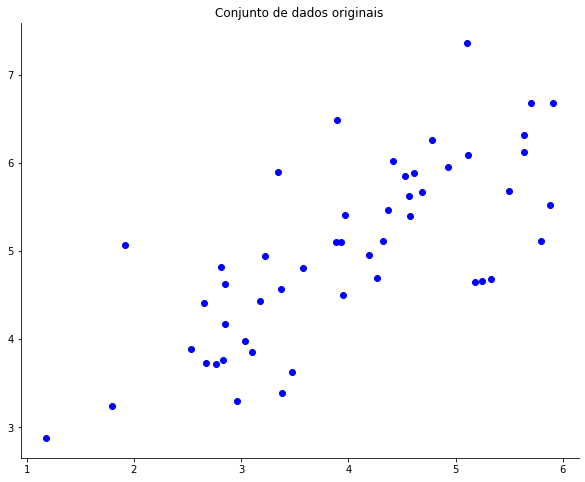

In [ ]:
#Carga do conjunto de dados
import scipy
raw_mat = scipy.io.loadmat('../data/ex7data1.mat')
X = raw_mat.get('X')

#Plotagem dos dados originais
plt.figure(figsize=(10,8))
plt.plot(X[:,0], X[:,1], 'bo')
plt.title('Conjunto de dados originais')
sns.despine()
plt.savefig('../target/plot2.1.png')

##2.2 Implementação do PCA - *Principal Component Analysis*

Conferência das características adicionais e normalização antes de iniciar o processo de PCA.

In [ ]:
#Visualização das primeiras linhas do conjunto de dados
X[:10]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929]])

In [ ]:
#Normalização das características
from main import normalize_features
X_norm, mu, sigma = normalize_features(X)

In [ ]:
#Conferência do resultado da normalização
print(X_norm[:5], mu, sigma, sep='\n\n')

[[-0.52331306 -1.59279252]
 [ 0.46381518  0.84034523]
 [-1.14839331 -0.58315891]
 [-1.05405373 -1.27071783]
 [-0.98402167 -0.81658417]]

[3.98926528 5.00280585]

[1.16126017 1.01312201]


Implmentação do PCA a partir das equações:

**Matriz de Covariância:**

$
\Sigma = \frac{1}{m}XX^T
$

Onde:
* $X$ é matriz de dados originais
* $m$ é o número de exemplos
* $\Sigma$ é a matriz de covariância de $X$ com dimensões $m\times m$

**PCA**:

Obtido pela decomposição da matriz de covariância $\Sigma$ através da técnica *decomposição de valores singulares* (SVD) implementada através da biblioteca `numpy` na função `linalg.svd`.


In [ ]:
#Implementação do PCA em uma função personalizada
def pca(X):
  ################################################
  # Essa funcao deve retornar U e S, duas das
  # tres matrizes geradas pela decomposicao
  # da matriz de covariância de X.
  #U => Componentes principais
  #S => Vetor com os valores singulares
  ################################################
  
  #Define m como o número de exemplos de X
  m = X_norm.shape[0]

  #Calcula a matriz de covariância
  X_mc = (1/m) * np.dot(X.T, X)

  #Decomposição da matriz de covariância (SVD)
  U, S, V = np.linalg.svd(X_mc)

  return (U, S)

In [ ]:
U, S = pca(X_norm)
print('PCA de X:', U, sep='\n')

PCA de X:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
#Conferência das dimensões
print(X_norm.shape, U.shape)

(50, 2) (2, 2)


##2.3 Redução da Dimensionalidade

Nas subseções a seguir será feita a utilização dos autovetores retornados pelo PCA para projetar o conjunto de dados originais para o espaço unidemsional.

Antes de iniciar este processo, apresentamos a seguir uma visualização dos autovetores gerados.

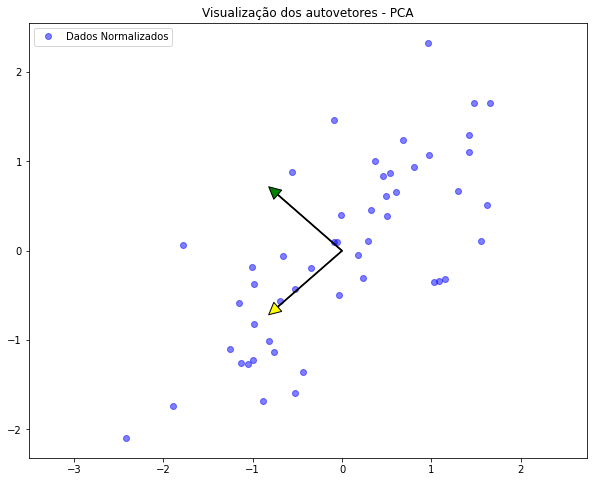

In [ ]:
plt.figure(figsize=(10,8))

plt.axis('equal')
plt.plot(X_norm[:,0], X_norm[:,1], 'bo', alpha=0.5)

K = 2
for axis, color in zip(U[:K], ['yellow','green']):
  start, end = np.zeros(2), (mu + sigma * axis)[:K] - (mu)[:K]
  plt.annotate('', xy=end,xytext=start,
               arrowprops=dict(facecolor=color, width=0.8))
plt.title('Visualização dos autovetores - PCA')
plt.legend(['Dados Normalizados'], loc=2)

plt.axis('equal')
plt.savefig('../target/plot2.3.png')

###2.3.1 Projetando os dados nos componentes principais

Uso do PCA para projetar os dados para o novo espaço dimensional através da função `project_data`. Cada linha equivale à projeção de um exemplo bidimensional para o espaço unidimensional, definido neste exemplo pelo parâmetro $K=1$.

In [ ]:
from main import project_data
#Realizando a projeção
K = 1
Z = project_data(X_norm, U, K)

In [ ]:
#Exibindo as primeiras observações dos dados projetados
Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

In [ ]:
#Projetando apenas o primeiro exemplo de X
print('X original:', X[0])
print('X normalizado:', X_norm[0])
print('X projetado para 1 dim:', project_data(X_norm[0].reshape(-1,1).T, U, K))

X original: [3.38156267 3.38911268]
X normalizado: [-0.52331306 -1.59279252]
X projetado para 1 dim: [[1.49631261]]


###2.3.2 Reconstruindo uma aproximação dos dados

Realização do processo inverso para recuperar os dados do espaço unidimensional para o espaço dimensional original. Este tipo de processo ocorre com algum nível de perda, por isso, os valores projetados de volta para a dimensão original não serão necessariamente iguais aos valores que lhes deram origem.

In [ ]:
from main import recover_data
X_rec = recover_data(Z, U, K)

In [ ]:
#Exibindo as primeiras observações dos dados recuperados
X_rec[:10]

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802]])

###2.3.3 Visualizando as projeções

Por fim, para conferência do resultado da redução da dimensionalidade, projetamos a seguir as observações originais (normalizadas) e os dados projetados para uma dimensão. 

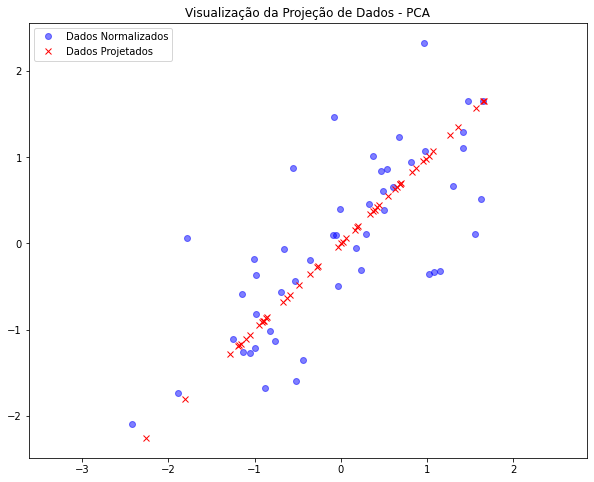

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(X_norm[:,0], X_norm[:,1], 'bo', alpha=0.5)
plt.plot(X_rec[:,0], X_rec[:,1], 'rx')

plt.title('Visualização da Projeção de Dados - PCA')
plt.legend(['Dados Normalizados', 'Dados Projetados'], loc=2)

plt.axis('equal')
plt.savefig('../target/plot2.3.3.png')

In [ ]:
#Retornando para o diretório de trabalho inicial
os.chdir('../')

#3 Agrupamento

As ações dessa seção estão sendo implementadas seguindo a lógica do script* `kmeans/main.py`, contudo executadas de maneira separada nas células do notebook para melhor acompanhamento de cada etapa do processo de agrupamento usano o algoritmo *k-Means*.

*Disponível em: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t2/kmeans

##3.1 Implmentando K-means

In [ ]:
#Carga dos dados
raw_mat = scipy.io.loadmat('data/ex7data2.mat')
X = raw_mat.get('X')
K = 3

X[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

Visualização dos dados originais para uma exploração visual inicial.

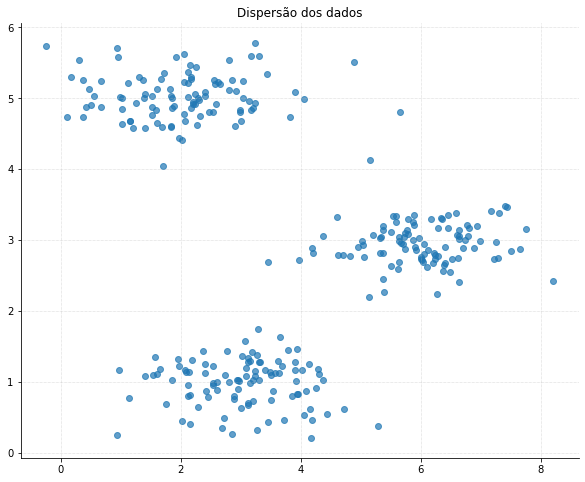

In [ ]:
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.7)
plt.title('Dispersão dos dados')

sns.despine()

plt.savefig('target/plot3.1.png')

###3.1.1 Implementação simplificada com Scikit-Learn

Para melhor entendimento das tarefas necessárias para as próximas seções, inicialmente está sendo feita a implementação de um modelo *k-Means* com a bilioteca `Scikit-Learn`, usando a classe `KMeans`.

In [ ]:
from sklearn.cluster import KMeans

#Criação do objeto com o agrupador
kmeans = KMeans(n_clusters=K)

#Treinamento do modelo
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Uso do modelo para predição dos grupos
y_pred = kmeans.predict(X)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], d

In [ ]:
#Identificação dos centroides de cada grupo
kmeans.cluster_centers_

array([[6.03366736, 3.00052511],
       [1.95399466, 5.02557006],
       [3.04367119, 1.01541041]])

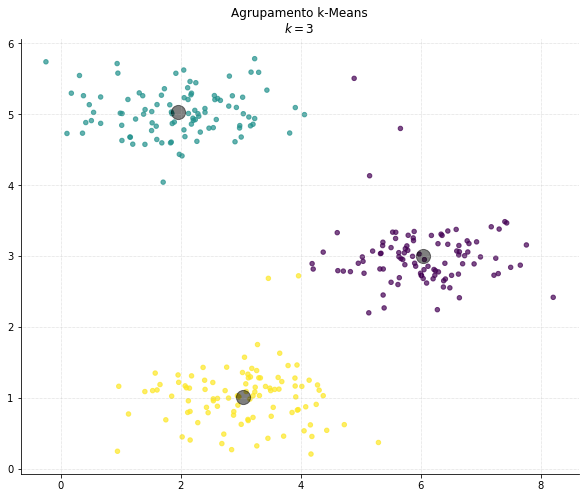

In [ ]:
#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Plotagem da dispersão com cores para diferenciar os grupos
#Neste gráfico usamos os modelos previstos para definir a cor dos grupos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='viridis', alpha=0.7)

#Plotagem do centróide de cada grupo
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#Configurações visuais adicionais
plt.title('Agrupamento k-Means\n$k=3$')
sns.despine()

plt.savefig('target/plot3.1.1.png')

Nesta visualização as cores dos pontos menores diferenciam os agrupamentos feitos pelo algoritmo. Os pontos marcados como círculos pretos maiores referem-se aos centróides identificados pelo k-Means.

##3.2 Encontrando centróides mais próximos

**Implementação do zero do algoritmo k-Means:**

Os detalhes da implementação estão nos comentários da função. Após sua implementação é realizado o teste nos primeiros três exemplos do conjunto de dados, para os quais espera-se a classificação nos grupos 0, 2 e 1, respectivamente.


In [ ]:
#Implementação da função para cálculo dos centróides
def find_closest_centroids(X, centroids):
  K = np.size(centroids, 0)
  idx = np.zeros((len(X), 1), dtype=np.int8)
  
  ##################################################
  # SEU CODIGO AQUI
  #Quantidade de exemplos no conjunto de dados
  m = np.size(X, 0)

  for i in range(m):

    for j in range(K):
      #Calcula a distância Euclidiana entre o i-ésimo X e o j-ésimo centroide
      distance = np.linalg.norm(X[i] - initial_centroids[j])
    
      #Se for a primeira iteração de m seta min_dist = distance
      if j == 0:
        min_dist = distance

      #Compara as distâncias de cada iteração
      #Se for a menor atribue o valor a min_dist e grava o índice do centroide
      if distance < min_dist:
        min_dist = distance
        idx[i] = j
  ##################################################

  return idx

In [ ]:
#Centróides iniciais
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

#Conferência da função com os três primeiros exemplos
#Valores esperados [0 2 1]
find_closest_centroids(X[:3], initial_centroids)

array([[0],
       [2],
       [1]], dtype=int8)

Uma vez que os valores previstos foram confirmados de maneira adequada, a função é aplicada abaixo para identificar os centroides para o conjunto de dados completo. Em seguida é gerada a visualizção das atribuições iniciais de pontos aos k grupos.

In [ ]:
#Aplicação da função
idx = find_closest_centroids(X, initial_centroids)

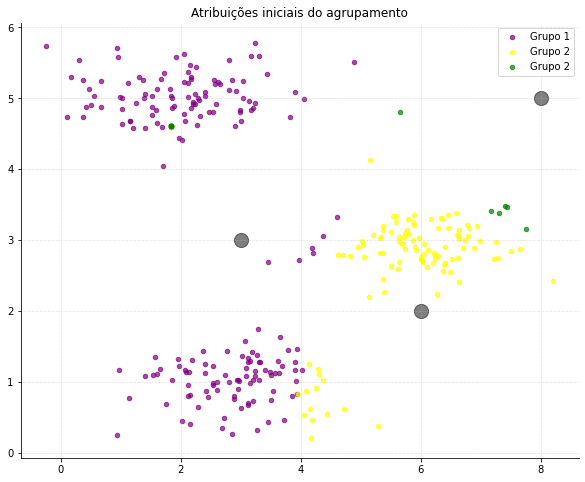

In [ ]:
#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Visualização de cada grupo
plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1],
            color='purple', marker='o', alpha=0.7, s=20, label='Grupo 1')

plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1],
            color='yellow', marker='o', alpha=0.7, s=20, label='Grupo 2')

plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1],
            color='g', marker='o', alpha=0.7, s=20, label='Grupo 2')


#Plotagem do centróide de cada grupo
centers = initial_centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#Configurações visuais adicionais
plt.legend()
sns.despine()
plt.title('Atribuições iniciais do agrupamento')

plt.savefig('target/plot3.2.png')

O agrupamento inicial já conseguiu fazer uma diferenciação básica das observações, contudo, percebe-se claramente pontos marcados em roxo em localizações bem distantes. Além disso o grupo identificado pelas marcações em verde quase não se distinguem dos valores à direita e acima dos valores amarelo. Por fim, há valores dos três grupos misturados em algumas coordenadas do gráfico, como no caso da parte superior esquerda, próximo às coordenadas [2, 3].

Os centróides iniciais foram marcados como círculos pretos maiores.

##3.3 Atualizações dos centróides

Nesse ponto realizamos a personalização da função `compute_centroids` para que seja possível recalcular os centroides a cada iteração do k-Means.

In [ ]:
def compute_centroids(X, idx, K):
  centroids = np.zeros((K,np.size(X,1)))

  ##################################################
  # SEU CODIGO AQUI
  #Cálculo da atualização dos centroides conforme equação do item 3.3
  for i in range(K):
    #Identificação dos exemplos do grupo
    grupo_indices = np.where(idx == i)[0]
    Ck = X[grupo_indices,:]

    #Aplicação da equação
    centroids[i,:] = (1/len(Ck))*sum(Ck)
  ##################################################

  return centroids

In [ ]:
centroids = compute_centroids(X, idx, K)
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

Após ajuste nas funções e execução para atualização dos centróides foram encontrados os valores a última listagem acima.

##3.4 k-Means aplicado ao conjunto de dados de exemplo

As seções a seguir aplicam a funções para atualização do valor dos centróides, em seguida é feita a visualização gráfica dos novos grupos.

In [ ]:
def run_kmeans(X, initial_centroids, max_iters, plot_progress=False):
	K = np.size(initial_centroids, 0)
	centroids = initial_centroids 
	previous_centroids = centroids

	for iter in range(max_iters):
		# Assignment of examples do centroids
		idx = find_closest_centroids(X, centroids)

		# PLot the evolution in centroids through the iterations
		if plot_progress:
			plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
			plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
			plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
			plt.plot(previous_centroids[:,0], previous_centroids[:,1], 'yo')
			plt.plot(centroids[:,0], centroids[:,1], 'bo')
			plt.show()

		previous_centroids = centroids

		# Compute new centroids
		centroids = compute_centroids(X, idx, K)

	return (centroids, idx)

In [ ]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=False)
print('Centroids after the 1st update:\n' + str(centroids))

Centroids after the 1st update:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


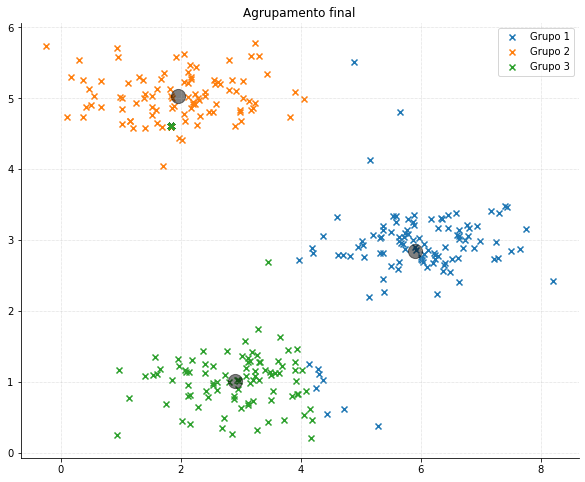

In [ ]:
#Aplicação da função
idx_new = find_closest_centroids(X, centroids)

#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

plt.scatter(X[np.where(idx_new==0),0],X[np.where(idx_new==0),1], marker='x', label='Grupo 1')
plt.scatter(X[np.where(idx_new==1),0],X[np.where(idx_new==1),1], marker='x', label='Grupo 2')
plt.scatter(X[np.where(idx_new==2),0],X[np.where(idx_new==2),1], marker='x', label='Grupo 3')
plt.title('Agrupamento final')

#Plotagem do centróide de cada grupo
centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.legend()
sns.despine()

plt.savefig('target/plot3.4.png')

##3.5 Inicialização aleatória

Por fim, para evitar a necessidade de definição arbitrária dos centróides iniciais, a função a seguir implementa a geração de valores aletórios para inicialização.

In [ ]:
def kmeans_init_centroids(X, K):
	return X[np.random.choice(X.shape[0], K, replace=False)]

initial_centroids = kmeans_init_centroids(X, K)
print(initial_centroids)
print('='*40)

max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=False)
print('Centroids after the 1st update:\n' + str(centroids))

[[6.29206262 2.77573856]
 [1.5143529  4.77003303]
 [1.40260822 1.08726536]]
Centroids after the 1st update:
[[5.90023404 2.84195535]
 [1.95399466 5.02557006]
 [2.91070632 1.00915312]]


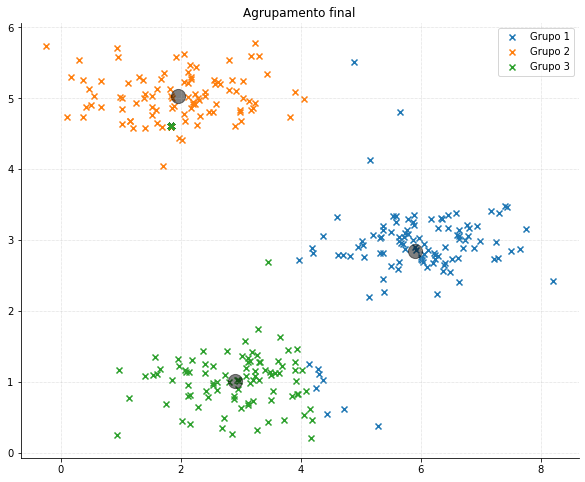

In [ ]:
#Aplicação da função
idx_new = find_closest_centroids(X, initial_centroids)

#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

plt.scatter(X[np.where(idx_new==0),0],X[np.where(idx_new==0),1], marker='x', label='Grupo 1')
plt.scatter(X[np.where(idx_new==1),0],X[np.where(idx_new==1),1], marker='x', label='Grupo 2')
plt.scatter(X[np.where(idx_new==2),0],X[np.where(idx_new==2),1], marker='x', label='Grupo 3')
plt.title('Agrupamento final')

#Plotagem do centróide de cada grupo
centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.legend()
sns.despine()

plt.savefig('target/plot3.5.png')

Desta forma concluímos a implementação e execução do algoritmo k-Means e como pode ser visto na visualização o agrupamento foi realizado de maneira adequada.

#4 Detecção de Anomalias

Para analisar o comportamento de servidores em um data center, serão analisados dados coletados relativos à vazão em mb/s e latência em ms. Inicialmente, carregamos os dados e geramos uma visualização básica da dispersão das características.

In [24]:
#Carga do arquivo
import scipy.io as spio
arquivo = 'data/ex8data1.mat'
data = spio.loadmat(arquivo)

In [25]:
#Conferência dos dados
#Saída muito extensa - Comentada para uso apenas para na conferência
#print(data)

#Carga dos subconjuntos de treino, teste e validação
X = np.array(data['X'])

X_val = np.array(data['Xval'])
y_val = data['yval'].flatten()

In [26]:
#Conferência da dimensão do conjunto de dados
print(X.shape, X_val.shape, y_val.shape)

(307, 2) (307, 2) (307,)


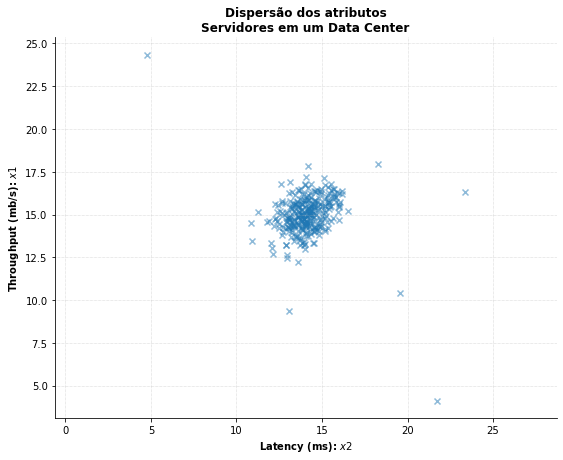

In [27]:
plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:,0], X[:,1], marker='x', alpha=0.5)


#Configurações visuais adicionais
plt.title('Dispersão dos atributos\nServidores em um Data Center',
          fontweight='bold')
plt.ylabel('Throughput (mb/s): $x1$', fontweight='bold')
plt.xlabel('Latency (ms): $x2$', fontweight='bold')
plt.axis('equal')
sns.despine()

plt.savefig('target/plot4.png')

##4.1 Distribuição Gaussiana

Nesta seção vamos analisar os dados em mais detalhes e na sequência, para identificar anomalias, vamos estimar parâmetros para a distribuição *gaussiana*.

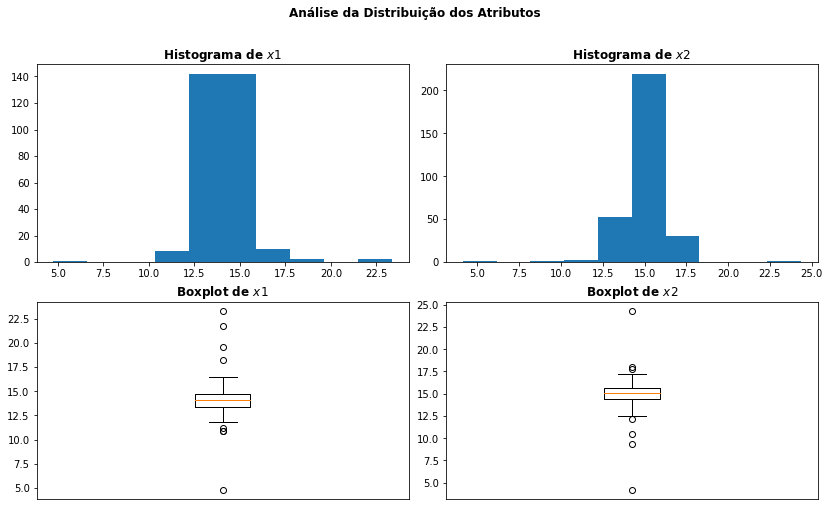

In [28]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Análise da Distribuição dos Atributos', fontweight='bold')

#Criação dos subplots
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


#Histogramas
ax1.hist(X[:,0])
ax1.set_title('Histograma de $x1$', fontweight='bold')

ax2.hist(X[:,1])
ax2.set_title('Histograma de $x2$', fontweight='bold')


#Boxplots
ax3.boxplot(X[:,0])
ax3.set_title('Boxplot de $x1$', fontweight='bold')

ax4.boxplot(X[:,1])
ax4.set_title('Boxplot de $x2$', fontweight='bold')


#Configurações visuais adicionais
ax3.set_xticks([])
ax4.set_xticks([])
plt.subplots_adjust(wspace=0.1)

plt.savefig('target/plot4.1.png')

As visualizações acima já permitem uma primeira intuição da existência de *outliers* no conjunto de dados, como pode ser vistos nos pontos acima dos limites inferiores e superiores de outliers, bem como pelas observações existentes em faixas de valores afastadas dos pontos médios de cada histograma.

##4.2 Estimativa de parâmetros para uma gaussiana

Para prosseguir a análise será implementada uma função do zero para estimativa dos parâmetros da distribuição *gaussiana*.

In [29]:
def estimate_gaussian_params(X):
  """
  Essa funcao deve computar e retornar mu e sigma2,
  vetores que contem a media e a variancia de cada
  caracteristica (feature) de X.
  """
  ########################
  # SEU CODIGO AQUI :
  ########################
  mu = np.mean(X, axis=0)
  sigma2 = np.var(X, axis=0)

  return (mu, sigma2)

In [30]:
mu, sigma2 = estimate_gaussian_params(X)
print(f'mu:     {mu}\nsigma2: {sigma2}')

mu:     [14.11222578 14.99771051]
sigma2: [1.83263141 1.70974533]


Com a implmentação chegamos aos vetore com os valores de $\mu$ e $\sigma^2$ apresentados na listagem anterior.

---

Agora plotaremos os a visualização dos contornos da distribuição *gaussiana* ajustada.

In [31]:
#Função implementada do repositório da disciplina sem alterações
# Source: https://github.com/Grzego/handwriting-generation/issues/16 
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

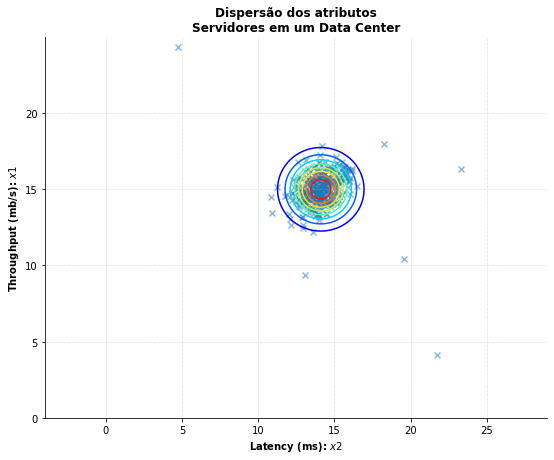

In [32]:
#Dados adicionais para construção dos contornos
x = np.arange(0, 25, .025)
y = np.arange(0, 25, .025)
first_axis, second_axis = np.meshgrid(x, y)

Z = bivariate_normal(first_axis, second_axis,
                     np.sqrt(sigma2[0]), np.sqrt(sigma2[1]),
                     mu[0], mu[1])

plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:,0], X[:,1], marker='x', alpha=0.5)

#Contornos da Gaussiana
plt.contour(first_axis, second_axis, Z, 10, cmap=plt.cm.jet)

#Configurações visuais adicionais
plt.title('Dispersão dos atributos\nServidores em um Data Center',
          fontweight='bold')
plt.ylabel('Throughput (mb/s): $x1$', fontweight='bold')
plt.xlabel('Latency (ms): $x2$', fontweight='bold')
plt.axis('equal')
sns.despine()

plt.savefig('target/plot4.2.png')

Nesta visualização os círculos plotados pelo contorno representam a distribuição gaussiana estimada para o conjunto de dados. Pode-se perceber que a maioria das observações estão dentro dos limites de maior probabilidade. Os valores fora destes limites tem menor probabilidade de ocorrência na distribuição *gaussiana* e por isso representam anomalias.

##4.3 Selecionando $\epsilon$

Para investigar a existência no conjunto de dados de maneira mais direta, classificando os pontos de acordo com sua probabilidade de pertencimento à distribuição *gaussiana*, será selecionado um limite identificado por $\epsilon$. Definido este limite a identificação dos pontos que representam anomalias é dada por:

* Se $Pr(x) < \epsilon$, então x é anomalia

---

A função `select_epsilon` implementa a definição do $\epsilon$. Antes de sua implementação as células a seguir calculam a probabilidade dos valores e o desvio padrão que serão usados como argumentos desta função.

In [33]:
#Preparação dos dados adicionais
from scipy import stats

#Cálculo do desvio padrão dos dados
stddev = np.sqrt(sigma2)

#Cálculo da probabilidade - Usando conjunto de validação
pval = np.zeros((X_val.shape[0], X_val.shape[1]))  
pval[:,0] = stats.norm.pdf(X_val[:,0], mu[0], stddev[0])  
pval[:,1] = stats.norm.pdf(X_val[:,1], mu[1], stddev[1])

#Conferência da dimensão
print(np.prod(pval, axis=1).shape)

(307,)


In [34]:
#Conferência das primeiras linhas de pval
pval[:5]

array([[0.13668804, 0.30457725],
       [0.27727265, 0.29540963],
       [0.25238744, 0.16132253],
       [0.27314666, 0.22661829],
       [0.26277866, 0.27090007]])

A seguir é realizada a seleção de um subconjunto menor e criados dados fictícios de predições para testar a implementação de uma função para cálculo da métrica *F1 Score*.

In [35]:
#Subconjunto com os primeiros 10 exemplos
y_real = np.array(y_val[:10])
y_real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [36]:
#Predições fictícias para teste da função f1_score_
y_pred = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [37]:
def f1_score_(y_real, y_pred, matriz=False):
  """
  Função implementa o cálculo manual da métrica F1 Score

  Função funciona para fins didáticos, mas não implementa
  a forma mais eficiente de cálculo. Para isso, há implementações
  prontas como na biblioteca Scikit-Learn classe metrics.f1_score
  """
  ##==============================================
  #Cálculos dos elementos da matriz de confusão
  ##==============================================
  #Inicialização de valores
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  m = np.size(y_pred)

  for k in range(0, len(y_pred)):
    #Checagem da previsão da classe positiva
    if int(y_pred[k]) == 1:
      if int(y_pred[k]) == y_real[k]:
        tp += 1
      else:
        fp += 1

    #Checagem da previsão da classe negativa
    elif int(y_pred[k]) == 0:
      if int(y_pred[k]) == y_real[k]:
        tn += 1
      else:
        fn += 1

  ##========================================
  #Cálculos das métricas precision e recall
  ##========================================
  try:
    prec = (tp) / (tp + fp)
  except ZeroDivisionError:
        prec = 0
  try:
    rec = (tp) / (tp + fn)
  except ZeroDivisionError:
        rec = 0

  ##========================================
  #Cálculo do F1
  ##========================================
  try:
    f1 = (2 * prec * rec)/(prec + rec)
  except ZeroDivisionError:
    f1 = 0

  if matriz == True:
    print(f'TP: {tp} FP: {fp}')
    print(f'TN: {tn} FN: {fn}')
    matriz = {'TP': tp, 'FP': fp,
              'TN': tn, 'FN': fn}

    return f1, matriz

  return f1

In [38]:
#Execução do teste da aplicação da função
f1, matriz = f1_score_(y_real, y_pred, True)
print('-'*50)
print(f1, matriz)

TP: 1 FP: 1
TN: 8 FN: 0
--------------------------------------------------
0.6666666666666666 {'TP': 1, 'FP': 1, 'TN': 8, 'FN': 0}


Personalização da função `select_epsilon`.

In [39]:
#Personalização da função select_epsilon 

"""
A implementação poderia ser simplificada pelo uso do f1_score ativando
a linha de código ativada abaixo e substituindo a chamada da função f1_score_
pela classe abaixo, conforme linha comentada no loop interno

#from sklearn.metrics import f1_score
"""

def select_epsilon(pval, yval):
  best_epsilon_value = 0
  best_f1_value = 0

  step_size = (pval.max() - pval.min()) / 1000

  print('step size: ' + str(step_size))

  for epsilon in np.arange(pval.min(), pval.max(), step_size):
      preds = pval < epsilon
      #Substituir a linha abaixo para uso com Scikit-Learn
      #f = f1_score(y_val, preds)

      #Uso da função personalizada para o f1 score
      f = f1_score_(y_val, preds)

      if f > best_f1_value:
        best_f1_value = f
        best_epsilon_value = epsilon

  ########################
  # SEU CODIGO AQUI :
  # Dentro deste loop, voce deve implementar logica para
  # definir corretamente os valores das variaveis
  # best_epsilon_value e best_f1_value.
  ########################
  return best_epsilon_value, best_f1_value

In [40]:
epsilon, _ = select_epsilon(np.prod(pval, axis=1), y_val)
print('Best value found for epsilon: ' + str(epsilon))

step size: 8.990852779269493e-05
Best value found for epsilon: 8.990852779269493e-05


Por fim, aplicamos a função para identificação do limite *epsilon* para detectar as anomalias no conjunto de dados analisado. As anomalias detectadas estão marcadas em vermelho na visualização a seguir.

<Figure size 432x288 with 0 Axes>

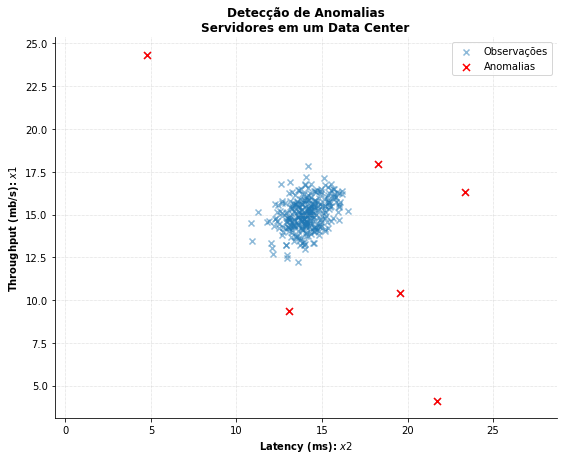

In [41]:
#Dados adicionais para detecção das anomalias
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm.pdf(X[:,0], mu[0], stddev[0])  
p[:,1] = stats.norm.pdf(X[:,1], mu[1], stddev[1])

#Aplicação do modelo para detecção de anomalias nos exemplos de X
anomalies = np.where(np.prod(p, axis=1) < epsilon)

plt.clf()
plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:,0], X[:,1], marker='x', alpha=0.5, label='Observações')

#Detecção das anomalias
plt.scatter(X[anomalies[0],0], X[anomalies[0],1], s=50,
            color='r', marker='x', label='Anomalias') 

#Configurações visuais adicionais
plt.title('Detecção de Anomalias\nServidores em um Data Center',
          fontweight='bold')
plt.ylabel('Throughput (mb/s): $x1$', fontweight='bold')
plt.xlabel('Latency (ms): $x2$', fontweight='bold')
plt.axis('equal')
plt.legend(loc='best')
sns.despine()

plt.savefig('target/plot4.3.png')

#Referências

**Referências**

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

---

**Algoritmos e conjuntos de dados:**

Bibliotecas personalizadas e conjuntos de dados usados na análise: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1/code

Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T1/code

Seleção de modelos: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_modelselection.ipynb

Avaliação de modelo: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_modeleval_sup.ipynb

Árvore de decisão: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_dtree.ipynb

kNN: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_knn.ipynb

Naive Bayes: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_naivebayes.ipynb

Curva de aprendizado: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve

Aplicação das funções curva de aprendizado: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

Análise de Componentes Principais - PCA: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais

Agrupamento: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml_clustering.ipynb

Detecção de Anomalias: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t2/detanom